# YanuX Skeletron User Study

## Imports

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime, date, time

## Helper Functions

In [2]:
def print_stats(data, hist_bins=None, plt_size=(8,6)):
    results = {
        'describe': data.describe(),
        'value_counts': data.value_counts()
    }
    
    print('--- Statistics ----')
    display(results['describe'])
    print('\n')
    
    print('--- Counting Unique Values ----')
    display(results['value_counts'])
    print('\n')
    
    if hist_bins is None:
        print('--- Basic Bar Chart ----')
        results['value_counts'].sort_index().plot(kind='bar', figsize=plt_size)
    else:
        print('--- Basic Histogram ----')
        data.hist(bins=hist_bins, figsize=plt_size)
    
    plt.show()
    
    return results
    
def calculate_sus(data):
    for i in range(len(data.columns)):
        if i % 2:
            data.iloc[:,i] = 7 - data.iloc[:,i]
        else:
            data.iloc[:,i] = data.iloc[:,i] - 1

    data['SUS Score'] = data.iloc[:,0:10].sum(axis=1)
    data['SUS Score 100'] = data['SUS Score'] * (100/60)
    return data

def confidence_interval_t(data, confidence_level=0.95):
    return stats.t.interval(confidence_level, data.count()-1, data.mean(), data.sem())

def convert_time_to_timedelta(value):
    return datetime.combine(date.min, value) - datetime.min

def kendall_pval(x,y):
    return stats.kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return stats.pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return stats.spearmanr(x,y)[1]

def normality_tests(data, alpha=0.05):
    print('Shapiro-Wilk Test')
    stat, p =  stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    #print('D\'Agostino’s K^2 Test')
    #stat, p = stats.normaltest(data)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    #if p > alpha:
    #    print('Sample looks Gaussian (fail to reject H0)')
    #else:
    #    print('Sample does not look Gaussian (reject H0)')
    
    #print('Anderson-Darling Test')
    #result = stats.anderson(data)
    #p = 0
    #for i in range(len(result.critical_values)):
    #    sl, cv = result.significance_level[i], result.critical_values[i]
    #    if result.statistic < result.critical_values[i]:
    #        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    #    else:
    #        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(8,6), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

def statistical_significance_highlight(v):
    if v < 0.05:
        return 'color: red;'
    elif v < 0.1:
        return 'color: yellow;'
    else:
        return None

def calculate_correlation(data):
    results = {
        'Pearson\'s Correlation': data.corr(method='pearson'),
        'Pearson\'s Correlation p-value': data.corr(method=pearsonr_pval).style.applymap(statistical_significance_highlight),
        'Spearman\'s Correlation': data.corr(method='spearman'),
        'Spearman\'s Correlation p-value': data.corr(method=spearmanr_pval).style.applymap(statistical_significance_highlight),
        'Kendall\'s Correlation': data.corr(method='kendall'),
        'Kendall\'s Correlation p-value': data.corr(method=kendall_pval).style.applymap(statistical_significance_highlight)
    }
    
    print('Pearson\'s Correlation')
    display(results['Pearson\'s Correlation'])
    display(results['Pearson\'s Correlation p-value'])
    
    print('Spearman\'s Correlation')
    display(results['Spearman\'s Correlation'])
    display(results['Spearman\'s Correlation p-value'])
    
    print('Kendall Correlation')
    display(results['Kendall\'s Correlation'])
    display(results['Kendall\'s Correlation p-value'])
    
    return results

## Load Excel

In [3]:
data = pd.read_excel('data/userstudies/yanux-skeletron-data.xlsx', sheet_name=None)  

## Demographics

In [4]:
data_demographics = data['Demographics']
data_demographics

,Age,Gender,Education,Education Area,Devices Owned,Usage of Multiple Devices
0,52,Male,Master's Degree,Computer Science,"Desktop computer, Laptop computer, Smartphone",7
1,23,Female,Bachelor's Degree,Computer Science,"Laptop computer, Smartphone",5
2,24,Female,Bachelor's Degree,Computer Science,"Desktop computer, Laptop computer, Smartphone,...",6
3,22,Male,Bachelor's Degree,Computer Science,"Laptop computer, Smartphone, Smart TV",3
4,22,Male,Post-Secondary Education,Computer Science,"Desktop computer, Laptop computer, Smartphone",6
5,24,Female,Bachelor's Degree,Computer Science,"Laptop computer, Smartphone, Tablet, Smartwatc...",5
6,35,Male,Master's Degree,Computer Science,"Desktop computer, Laptop computer, Smartphone,...",7
7,25,Male,Bachelor's Degree,Computer Science,"Laptop computer, Smartphone, Tablet, Smart TV,...",5
8,29,Female,Secondary Education,Computer Science,"Desktop computer, Laptop computer, Smartphone,...",7
9,25,Male,Bachelor's Degree,Computer Science,"Desktop computer, Laptop computer, Smartphone,...",6


### Age

--- Statistics ----


count    19.000000
mean     26.842105
std       7.500097
min      20.000000
25%      23.000000
50%      24.000000
75%      26.000000
max      52.000000
Name: Age, dtype: float64



--- Counting Unique Values ----


24    4
25    4
23    3
22    2
52    1
35    1
29    1
20    1
27    1
38    1
Name: Age, dtype: int64



--- Basic Histogram ----


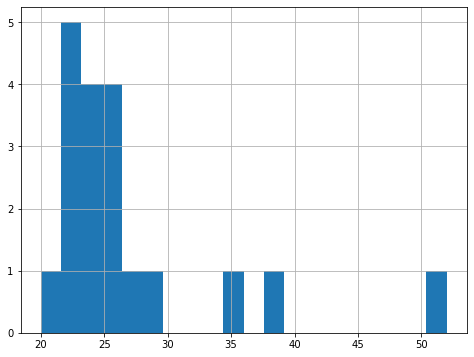

Population Standard Deviation:
7.300058816596054
Confidence Interval (95%):
(23.22717399890898, 30.457036527406807)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.679, p=0.000
Sample does not look Gaussian (reject H0)


In [5]:
data_demographics_age = data_demographics['Age']
print_stats(data_demographics_age, hist_bins=20)
print('Population Standard Deviation:')
print(data_demographics_age.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(data_demographics_age))
print('Normality Tests:')
normality_tests(data_demographics_age)

### Gender

--- Statistics ----


count       19
unique       2
top       Male
freq        15
Name: Gender, dtype: object



--- Counting Unique Values ----


Male      15
Female     4
Name: Gender, dtype: int64



--- Basic Bar Chart ----


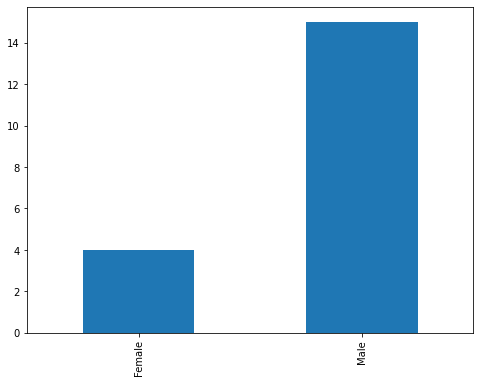

In [6]:
data_demographics_genre = data_demographics['Gender']
print_stats(data_demographics_genre);

### Education

--- Statistics ----


count                    19
unique                    5
top       Bachelor's Degree
freq                     12
Name: Education, dtype: object



--- Counting Unique Values ----


Bachelor's Degree           12
Master's Degree              3
Secondary Education          2
Post-Secondary Education     1
Doctoral Degree              1
Name: Education, dtype: int64



--- Basic Bar Chart ----


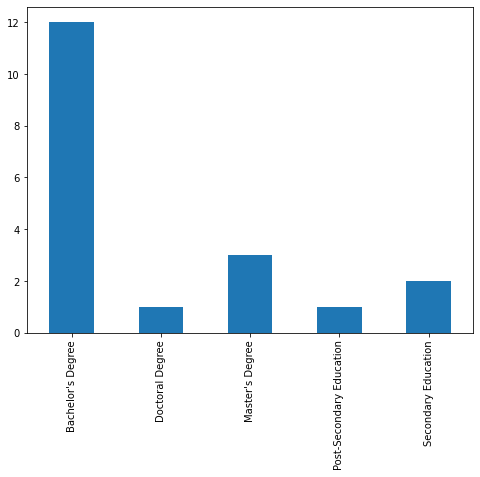

In [7]:
data_demographics_education = data_demographics['Education']
print_stats(data_demographics_education);

### Education Area

--- Statistics ----


count                   19
unique                   2
top       Computer Science
freq                    18
Name: Education Area, dtype: object



--- Counting Unique Values ----


Computer Science            18
Electrical Engineering\n     1
Name: Education Area, dtype: int64



--- Basic Bar Chart ----


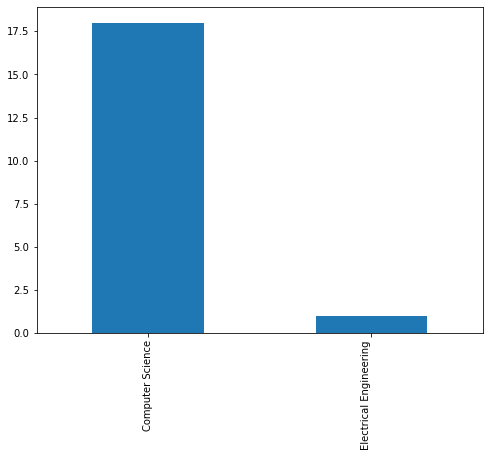

In [8]:
data_demographics_education_area = data_demographics['Education Area']
print_stats(data_demographics_education_area);

### Devices Owned

In [9]:
data_demographics_devices_owned = data_demographics['Devices Owned']
data_demographics_devices_owned_list = data_demographics_devices_owned.map(lambda x: [i.strip() for i in x.split(",")])

print('--- Statistics ----')
display(data_demographics_devices_owned_list.describe())
print('--- Counting Unique Values ----')
display(data_demographics_devices_owned.value_counts())

--- Statistics ----


count                                          19
unique                                         15
top       [Laptop computer, Smartphone, Smart TV]
freq                                            3
Name: Devices Owned, dtype: object

--- Counting Unique Values ----


Laptop computer, Smartphone, Smart TV                                                                          3
Desktop computer, Laptop computer, Smartphone                                                                  2
Laptop computer, Smartphone                                                                                    2
Desktop computer, Laptop computer, Smartphone, Tablet, Smart TV, Smartwatch                                    1
Laptop computer, Smartphone, Tablet, Smartwatch, Smart speaker                                                 1
Desktop computer, Laptop computer, Smartphone, Tablet, Smart TV, Smartwatch, Fitness tracker                   1
Laptop computer, Smartphone, Tablet, Smart TV, Fitness tracker                                                 1
Desktop computer, Laptop computer, Smartphone, Tablet, Fitness tracker                                         1
Desktop computer, Laptop computer, Smartphone, Smart TV                                         

#### Number of Devices Owned

In [10]:
mlb_devices_owned = MultiLabelBinarizer()
devices_owned_one_hot = pd.DataFrame(mlb_devices_owned.fit_transform(data_demographics_devices_owned_list),
                                     columns=mlb_devices_owned.classes_,index=data_demographics_devices_owned_list.index)
devices_owned_one_hot

,Desktop computer,Fitness tracker,Laptop computer,Smart TV,Smart speaker,Smartphone,Smartwatch,Tablet
0,1,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,1,0,1,1,0,1,1,1
3,0,0,1,1,0,1,0,0
4,1,0,1,0,0,1,0,0
5,0,0,1,0,1,1,1,1
6,1,1,1,1,0,1,1,1
7,0,1,1,1,0,1,0,1
8,1,1,1,0,0,1,0,1
9,1,0,1,1,0,1,0,0


In [11]:
num_devices_owned = devices_owned_one_hot.sum(axis=1)
num_devices_owned

0     3
1     2
2     6
3     3
4     3
5     5
6     7
7     5
8     5
9     4
10    4
11    4
12    3
13    3
14    8
15    3
16    5
17    2
18    3
dtype: int64

--- Statistics ----


count    19.000000
mean      4.105263
std       1.629408
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
dtype: float64



--- Counting Unique Values ----


3    7
5    4
4    3
2    2
6    1
7    1
8    1
dtype: int64



--- Basic Bar Chart ----


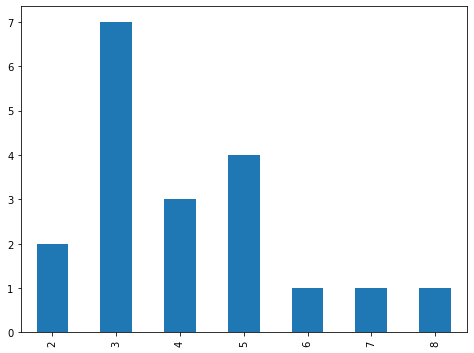

Population Standard Deviation:
1.5859493866651961
Confidence Interval (95%):
(3.3199135921708693, 4.890612723618605)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.896, p=0.040
Sample does not look Gaussian (reject H0)


In [12]:
print_stats(num_devices_owned)
print('Population Standard Deviation:')
print(num_devices_owned.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(num_devices_owned))
print('Normality Tests:')
normality_tests(num_devices_owned)

##### Device Types Owned

In [13]:
device_types_owned = devices_owned_one_hot.sum().sort_values(ascending=False)
device_types_owned

Smartphone          19
Laptop computer     18
Desktop computer    10
Smart TV            10
Smartwatch           7
Tablet               7
Fitness tracker      5
Smart speaker        2
dtype: int64

<AxesSubplot:>

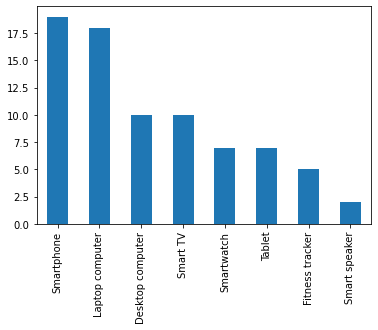

In [14]:
device_types_owned.plot(kind='bar')

##### Percentage of Participants that Own Each Type of Device

In [15]:
(devices_owned_one_hot.sum()/devices_owned_one_hot.count()*100).sort_values(ascending=False)

Smartphone          100.000000
Laptop computer      94.736842
Desktop computer     52.631579
Smart TV             52.631579
Smartwatch           36.842105
Tablet               36.842105
Fitness tracker      26.315789
Smart speaker        10.526316
dtype: float64

### Usage of Multiple Devices

--- Statistics ----


count    19.000000
mean      5.736842
std       1.484816
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Usage of Multiple Devices, dtype: float64



--- Counting Unique Values ----


7    8
5    4
6    4
3    1
2    1
4    1
Name: Usage of Multiple Devices, dtype: int64



--- Basic Bar Chart ----


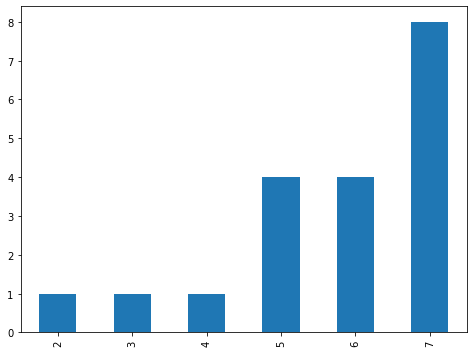

Population Standard Deviation:
1.4452137071311557
Confidence Interval (95%):
(5.021183732545341, 6.4525004779809745)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.821, p=0.002
Sample does not look Gaussian (reject H0)


In [16]:
data_demographics_usage_multiple_devices = data_demographics['Usage of Multiple Devices']
print_stats(data_demographics_usage_multiple_devices)
print('Population Standard Deviation:')
print(data_demographics_usage_multiple_devices.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(data_demographics_usage_multiple_devices))
print('Normality Tests:')
normality_tests(data_demographics_usage_multiple_devices)

#### Percentage of Users that User Multiple Devices Sometimes or More Often

In [17]:
(data_demographics_usage_multiple_devices[data_demographics_usage_multiple_devices >= 5].count()/data_demographics_usage_multiple_devices.count())*100

84.21052631578947

## Programming Experience

In [18]:
data_programming_experience = data['Programming Experience']
data_programming_experience

,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Experience with Programming Languages
0,30,6,6,"C, C++, C#, Delphi/Pascal, Java, Perl, PHP, Py..."
1,5,6,6,"C#, Dart, Java, Kotlin, Matlab, PHP, TypeScript"
2,6,4,4,"C++, C#, Java, Kotlin"
3,5,6,5,"C, C++, Java, Python, Ruby"
4,7,5,5,"C, C#, Dart, Java, Matlab, PHP, Python, R, Vis..."
5,5,4,4,"C, C#, Java, Python"
6,20,7,7,"C, C#, Java, PHP, Python, Visual Basic/Visual ..."
7,6,5,5,"C, C#, Dart, Java, Python, TypeScript"
8,4,3,3,"C, C++, C#, Java, Python, Visual Basic/Visual ..."
9,6,5,5,"C, C#, Java, Kotlin, Matlab, PHP, Python"


### Years of Programming Experience

--- Statistics ----


count    19.000000
mean      9.052632
std       7.152884
min       3.000000
25%       5.500000
50%       7.000000
75%       8.000000
max      30.000000
Name: Years of Programming Experience, dtype: float64



--- Counting Unique Values ----


6     4
7     4
5     3
8     2
30    1
20    1
4     1
3     1
9     1
23    1
Name: Years of Programming Experience, dtype: int64



--- Basic Histogram ----


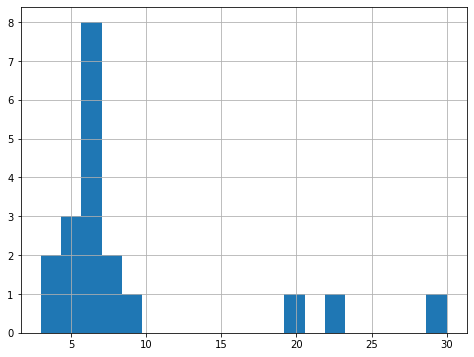

Population Standard Deviation:
6.962105581461963
Confidence Interval (95%):
(5.605052078051775, 12.50021107984296)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.663, p=0.000
Sample does not look Gaussian (reject H0)


In [19]:
data_programming_experience_years = data_programming_experience['Years of Programming Experience']
print_stats(data_programming_experience_years, hist_bins=20)
print('Population Standard Deviation:')
print(data_programming_experience_years.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(data_programming_experience_years))
print('Normality Tests:')
normality_tests(data_programming_experience_years)

### Programming Experience (Self Assessment)

--- Statistics ----


count    19.000000
mean      5.315789
std       1.157230
min       3.000000
25%       4.500000
50%       5.000000
75%       6.000000
max       7.000000
Name: Programming Experience (Self Assessment), dtype: float64



--- Counting Unique Values ----


6    6
5    5
4    4
7    3
3    1
Name: Programming Experience (Self Assessment), dtype: int64



--- Basic Bar Chart ----


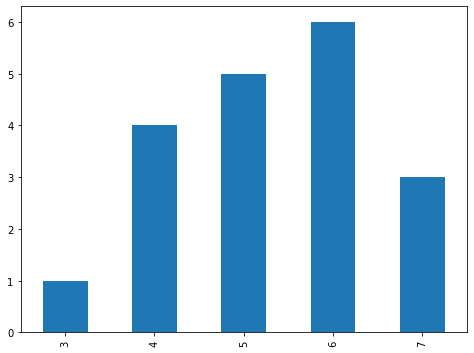

Population Standard Deviation:
1.1263649767911947
Confidence Interval (95%):
(4.758022464971793, 5.873556482396628)


In [20]:
data_programming_experience_self = data_programming_experience['Programming Experience (Self Assessment)']
print_stats(data_programming_experience_self)
print('Population Standard Deviation:')
print(data_programming_experience_self.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(data_programming_experience_self))

### JavaScript Experience (Self Assessment)

--- Statistics ----


count    19.000000
mean      4.526316
std       1.389181
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       7.000000
Name: JavaScript Experience (Self Assessment), dtype: float64



--- Counting Unique Values ----


5    7
4    4
6    3
3    3
7    1
1    1
Name: JavaScript Experience (Self Assessment), dtype: int64



--- Basic Bar Chart ----


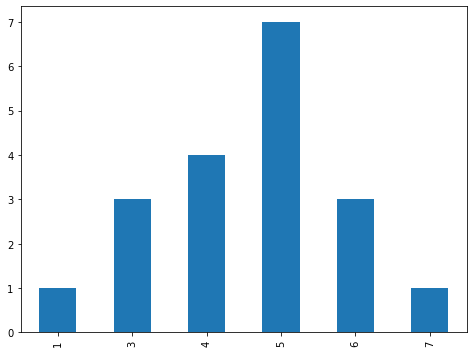

Population Standard Deviation:
1.3521297451226453
Confidence Interval (95%):
(3.85675185694034, 5.195879722007028)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.930, p=0.176
Sample looks Gaussian (fail to reject H0)


In [21]:
data_programming_experience_javascript = data_programming_experience['JavaScript Experience (Self Assessment)']
print_stats(data_programming_experience_javascript)
print('Population Standard Deviation:')
print(data_programming_experience_javascript.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(data_programming_experience_javascript))
print('Normality Tests:')
normality_tests(data_programming_experience_javascript)

### Experience with Programming Languages

In [22]:
data_programming_experience_languages = data_programming_experience['Experience with Programming Languages']
data_programming_experience_languages_list = data_programming_experience_languages.map(lambda x: [i.strip() for i in x.split(",")])

#### Programming Languages

In [23]:
mlb_programming_languages = MultiLabelBinarizer()
programming_languages_one_hot = pd.DataFrame(mlb_programming_languages.fit_transform(data_programming_experience_languages_list),
                                             columns=mlb_programming_languages.classes_,index=data_programming_experience_languages_list.index)
programming_languages_one_hot

,C,C#,C++,Dart,Delphi/Pascal,Java,Kotlin,Matlab,PHP,Perl,Python,R,Ruby,Swift,TypeScript,Visual Basic/Visual Basic for Applications
0,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1
1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,1,0
2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,1,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1
5,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
7,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
8,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1
9,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0


In [24]:
num_programming_languages = programming_languages_one_hot.sum(axis=1)
num_programming_languages

0      9
1      7
2      4
3      5
4      9
5      4
6      6
7      6
8      6
9      7
10    11
11    12
12     2
13     5
14     6
15     1
16     7
17     7
18     3
dtype: int64

--- Statistics ----


count    19.000000
mean      6.157895
std       2.813917
min       1.000000
25%       4.500000
50%       6.000000
75%       7.000000
max      12.000000
dtype: float64



--- Counting Unique Values ----


7     4
6     4
9     2
4     2
5     2
11    1
12    1
2     1
1     1
3     1
dtype: int64



--- Basic Bar Chart ----


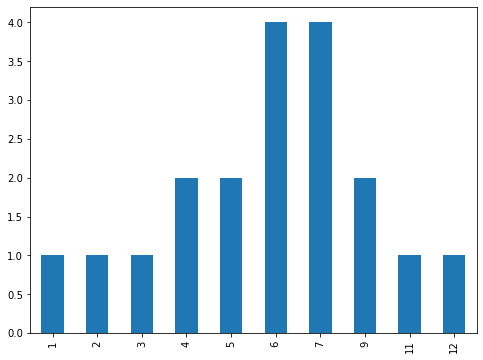

Population Standard Deviation:
2.7388656486858287
Confidence Interval (95%):
(4.801630176411011, 7.514159297273199)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.970, p=0.776
Sample looks Gaussian (fail to reject H0)


In [25]:
print_stats(num_programming_languages)
print('Population Standard Deviation:')
print(num_programming_languages.std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(num_programming_languages))
print('Normality Tests:')
normality_tests(num_programming_languages)

##### How Many Participants Know Each Programming Language

In [265]:
participants_programming_language = programming_languages_one_hot.sum().sort_values(ascending=False)
participants_programming_language

Java                                          16
C                                             14
C#                                            13
Python                                        12
C++                                            8
PHP                                            8
Kotlin                                         7
TypeScript                                     7
Visual Basic/Visual Basic for Applications     6
Dart                                           5
Matlab                                         5
Ruby                                           2
Delphi/Pascal                                  1
Perl                                           1
R                                              1
Swift                                          1
dtype: int64

<AxesSubplot:>

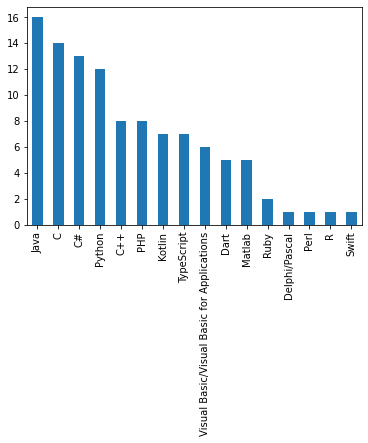

In [266]:
participants_programming_language.plot(kind='bar')

##### Percentage of Participants that Know Each Programming Language

In [26]:
(programming_languages_one_hot.sum()/programming_languages_one_hot.count()*100).sort_values(ascending=False)

Java                                          94.736842
C                                             78.947368
C#                                            78.947368
Python                                        73.684211
C++                                           47.368421
PHP                                           47.368421
Kotlin                                        36.842105
TypeScript                                    36.842105
Matlab                                        31.578947
Visual Basic/Visual Basic for Applications    31.578947
Dart                                          26.315789
Ruby                                          10.526316
Delphi/Pascal                                  5.263158
Perl                                           5.263158
R                                              5.263158
Swift                                          5.263158
dtype: float64

## Domain Specific Questions

- **DS1:** It makes sense that the UI state of an application is represented by an object.
- **DS2:** I understood how to save the UI state of an application every time it changes.
- **DS3:** I understood how to use the "Coordinator" API to perform various tasks that make my multi-device application behave properly?
- **DS4:** I understood how the DSL (Domain Specific Language) for the automatic distribution of UI components works.
- **DS5:** I understood how to use the "ComponentsRuleEngine" to determine the appropriate distribution of UI components based on the restrictions placed on them and the proxemics relationships between devices currently running application instances.
- **DS6:** I understood how the custom "YanuX Resource Management Element" can be used to manage multiple application states of an application.
- **DS7:** I understood how the custom "YanuX Components Distribution Element" can be used to manage the distribution of UI components of an application.	
- **DS8:** It makes sense to distribute the UI components of an application depending on how closely related the surrounding devices are.

In [27]:
data_domain_specific = data['Domain Specific']
data_domain_specific

,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
0,7,7,7,7,7,7,7,7
1,7,6,6,6,5,6,6,5
2,5,7,6,6,6,6,6,7
3,7,6,6,6,6,6,6,7
4,6,6,6,6,6,6,6,6
5,7,6,6,5,5,6,5,6
6,7,6,7,7,7,7,6,7
7,7,7,7,7,6,6,7,6
8,7,6,6,5,7,7,6,7
9,6,7,6,6,5,5,5,6


--- Statistics ----


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.421053,6.000000,6.105263,5.473684,5.631579,5.947368,5.947368,6.526316
std,0.901591,1.490712,0.657836,1.123903,0.955134,1.129094,0.779864,0.611775
min,4.000000,2.000000,5.000000,3.000000,4.000000,2.000000,4.000000,5.000000
25%,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000
50%,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000
75%,7.000000,7.000000,6.500000,6.000000,6.000000,6.500000,6.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000




--- Counting Unique Values ----


DS1  DS2  DS3  DS4  DS5  DS6  DS7  DS8
4    2    5    5    4    2    4    7      1
7    6    6    5    7    7    6    7      1
     7    7    7    6    6    7    6      1
               5    5    6    6    7      1
          6    5    6    6    6    7      1
     6    7    7    7    7    6    7      1
               3    7    7    7    7      1
          6    6    6    6    6    7      1
                    5    6    6    5      1
               5    5    6    5    7      1
5    6    5    3    5    6    6    6      1
7    6    6    5    5    6    5    6      1
     2    5    6    4    5    6    6      1
6    7    6    6    5    6    6    7      1
                         5    5    6      1
               5    6    7    7    6      1
     6    6    6    6    6    6    6      1
5    7    6    6    6    6    6    7      1
7    7    7    7    7    7    7    7      1
dtype: int64



--- Basic Histogram ----


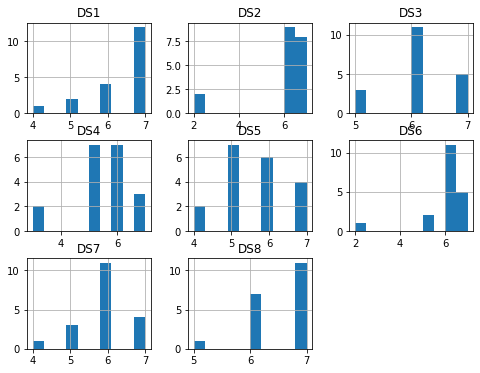

---- Question DS1 ----
Population Standard Deviation:
0.8775437895017403
Confidence Interval (95%):
(5.9864999026056624, 6.855605360552233)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.696, p=0.000
Sample does not look Gaussian (reject H0)


---- Question DS2 ----
Population Standard Deviation:
1.4509525002200232
Confidence Interval (95%):
(5.2814998224314, 6.7185001775686)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.608, p=0.000
Sample does not look Gaussian (reject H0)


---- Question DS3 ----
Population Standard Deviation:
0.6402907926629704
Confidence Interval (95%):
(5.7881962324412015, 6.422330083348273)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.796, p=0.001
Sample does not look Gaussian (reject H0)


---- Question DS4 ----
Population Standard Deviation:
1.093926825832975
Confidence Interval (95%):
(4.931980317057122, 6.01538810399551)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.856, p=0.008
Sample does not look Gaussian (reject H0)


---- Question DS5 ----
Popul

In [28]:
print_stats(data_domain_specific, hist_bins=10)

for column in data_domain_specific:
    print('---- Question', column,'----')
    print('Population Standard Deviation:')
    print(data_domain_specific[column].std(ddof=0))
    print('Confidence Interval (95%):')
    print(confidence_interval_t(data_domain_specific[column]))
    print('Normality Tests:')
    normality_tests(data_domain_specific[column])
    print('\n')

### Response Frequency

In [29]:
data_domain_specific_freq = (data_domain_specific.apply(pd.value_counts).fillna(0)/data_domain_specific.count()*100).transpose()
data_domain_specific_freq

,2,3,4,5,6,7
DS1,0.000000,0.000000,5.263158,10.526316,21.052632,63.157895
DS2,10.526316,0.000000,0.000000,0.000000,47.368421,42.105263
DS3,0.000000,0.000000,0.000000,15.789474,57.894737,26.315789
DS4,0.000000,10.526316,0.000000,36.842105,36.842105,15.789474
DS5,0.000000,0.000000,10.526316,36.842105,31.578947,21.052632
DS6,5.263158,0.000000,0.000000,10.526316,57.894737,26.315789
DS7,0.000000,0.000000,5.263158,15.789474,57.894737,21.052632
DS8,0.000000,0.000000,0.000000,5.263158,36.842105,57.894737


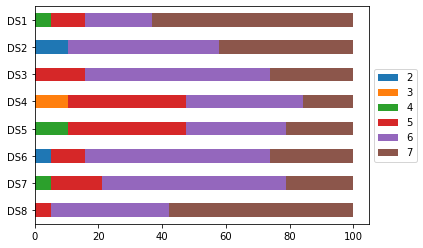

In [30]:
data_domain_specific_freq.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### Correlation

In [31]:
calculate_correlation(data_domain_specific);

Pearson's Correlation


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
DS1,1.000000,0.289349,0.576810,0.230848,0.383688,0.623296,0.428335,-0.021205
DS2,0.289349,1.000000,0.623173,0.099478,0.546258,0.693143,0.477876,0.060917
DS3,0.576810,0.623173,1.000000,0.304522,0.684084,0.606243,0.552852,0.268823
DS4,0.230848,0.099478,0.304522,1.000000,0.119849,0.020738,0.093408,-0.059536
DS5,0.383688,0.546258,0.684084,0.119849,1.000000,0.753745,0.643776,0.350280
DS6,0.623296,0.693143,0.606243,0.020738,0.753745,1.000000,0.753791,0.042330
DS7,0.428335,0.477876,0.552852,0.093408,0.643776,0.753791,1.000000,-0.055158
DS8,-0.021205,0.060917,0.268823,-0.059536,0.350280,0.042330,-0.055158,1.000000


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
DS1,1.000000,0.229544,0.009725,0.341676,0.104869,0.004356,0.067301,0.931336
DS2,0.229544,1.000000,0.004366,0.685342,0.015530,0.001000,0.038512,0.804339
DS3,0.009725,0.004366,1.000000,0.204929,0.001237,0.005931,0.014088,0.265767
DS4,0.341676,0.685342,0.204929,1.000000,0.625047,0.932846,0.703687,0.808696
DS5,0.104869,0.015530,0.001237,0.625047,1.000000,0.000194,0.002936,0.141499
DS6,0.004356,0.001000,0.005931,0.932846,0.000194,1.000000,0.000194,0.863388
DS7,0.067301,0.038512,0.014088,0.703687,0.002936,0.000194,1.000000,0.822544
DS8,0.931336,0.804339,0.265767,0.808696,0.141499,0.863388,0.822544,1.000000


Spearman's Correlation


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
DS1,1.000000,-0.065893,0.531587,0.151833,0.313759,0.354948,0.248303,0.114830
DS2,-0.065893,1.000000,0.489461,0.237216,0.284727,0.225780,0.393857,0.106809
DS3,0.531587,0.489461,1.000000,0.331106,0.653263,0.611700,0.539409,0.295503
DS4,0.151833,0.237216,0.331106,1.000000,0.200393,-0.022941,0.202031,-0.092539
DS5,0.313759,0.284727,0.653263,0.200393,1.000000,0.847306,0.640367,0.356912
DS6,0.354948,0.225780,0.611700,-0.022941,0.847306,1.000000,0.659285,0.274586
DS7,0.248303,0.393857,0.539409,0.202031,0.640367,0.659285,1.000000,-0.020345
DS8,0.114830,0.106809,0.295503,-0.092539,0.356912,0.274586,-0.020345,1.000000


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
DS1,1.000000,0.788691,0.019161,0.534922,0.190832,0.135908,0.305356,0.639709
DS2,0.788691,1.000000,0.033420,0.328145,0.237407,0.352673,0.095224,0.663409
DS3,0.019161,0.033420,1.000000,0.166142,0.002422,0.005383,0.017150,0.219340
DS4,0.534922,0.328145,0.166142,1.000000,0.410742,0.925730,0.406849,0.706327
DS5,0.190832,0.237407,0.002422,0.410742,1.000000,0.000005,0.003141,0.133603
DS6,0.135908,0.352673,0.005383,0.925730,0.000005,1.000000,0.002137,0.255256
DS7,0.305356,0.095224,0.017150,0.406849,0.003141,0.002137,1.000000,0.934115
DS8,0.639709,0.663409,0.219340,0.706327,0.133603,0.255256,0.934115,1.000000


Kendall Correlation


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
DS1,1.000000,-0.068680,0.507620,0.135526,0.285714,0.325317,0.224607,0.103639
DS2,-0.068680,1.000000,0.459377,0.208499,0.248966,0.199054,0.366201,0.099652
DS3,0.507620,0.459377,1.000000,0.308457,0.609641,0.576950,0.495328,0.272950
DS4,0.135526,0.208499,0.308457,1.000000,0.181831,-0.017457,0.198875,-0.082590
DS5,0.285714,0.248966,0.609641,0.181831,1.000000,0.802201,0.581048,0.326464
DS6,0.325317,0.199054,0.576950,-0.017457,0.802201,1.000000,0.622669,0.250313
DS7,0.224607,0.366201,0.495328,0.198875,0.581048,0.622669,1.000000,-0.019837
DS8,0.103639,0.099652,0.272950,-0.082590,0.326464,0.250313,-0.019837,1.000000


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8
DS1,1.000000,0.750759,0.018087,0.515443,0.168408,0.126805,0.289168,0.636827
DS2,0.750759,1.000000,0.034617,0.322981,0.235804,0.356144,0.087836,0.653906
DS3,0.018087,0.034617,1.000000,0.140975,0.003469,0.007083,0.020090,0.216258
DS4,0.515443,0.322981,0.140975,1.000000,0.369107,0.933081,0.336149,0.699735
DS5,0.168408,0.235804,0.003469,0.369107,1.000000,0.000106,0.004761,0.125650
DS6,0.126805,0.356144,0.007083,0.933081,0.000106,1.000000,0.003227,0.253047
DS7,0.289168,0.087836,0.020090,0.336149,0.004761,0.003227,1.000000,0.927428
DS8,0.636827,0.653906,0.216258,0.699735,0.125650,0.253047,0.927428,1.000000


## UMUX-Lite
- **ULI1:** The YanuX Framework's capabilities meet my requirements.
- **ULI2:** The YanuX Framework is easy to use.

In [32]:
data_umux_lite = data['UMUX-Lite']
data_umux_lite

,ULI1,ULI2
0,7,7
1,4,6
2,6,6
3,7,7
4,7,6
5,6,7
6,6,7
7,6,7
8,7,5
9,7,6


--- Statistics ----


,ULI1,ULI2
count,19.000000,19.000000
mean,5.894737,5.684211
std,1.048530,1.002920
min,4.000000,4.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,7.000000,6.500000
max,7.000000,7.000000




--- Counting Unique Values ----


ULI1  ULI2
5     5       4
6     7       3
7     6       3
      5       2
      7       2
4     4       1
      6       1
5     4       1
6     5       1
      6       1
dtype: int64



--- Basic Histogram ----


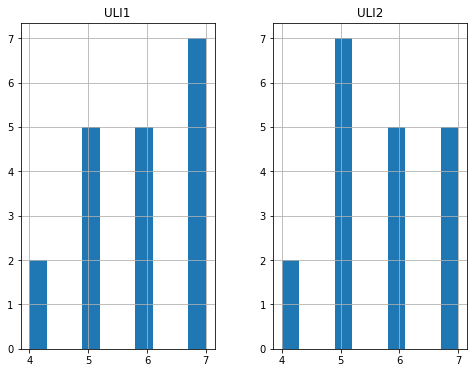

---- Question ULI1 ----
Population Standard Deviation:
1.020564180508701
Confidence Interval (95%):
(5.389361549113618, 6.400112135096908)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.852, p=0.007
Sample does not look Gaussian (reject H0)


---- Question ULI2 ----
Population Standard Deviation:
0.9761703679469161
Confidence Interval (95%):
(5.200818697430483, 6.167602355201096)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.873, p=0.016
Sample does not look Gaussian (reject H0)




In [33]:
print_stats(data_umux_lite, hist_bins=10)
for column in data_umux_lite:
    print('---- Question', column,'----')
    print('Population Standard Deviation:')
    print(data_umux_lite[column].std(ddof=0))
    print('Confidence Interval (95%):')
    print(confidence_interval_t(data_umux_lite[column]))
    print('Normality Tests:')
    normality_tests(data_umux_lite[column])
    print('\n')

### Response Frequency

In [34]:
data_umux_lite_freq = (data_umux_lite.apply(pd.value_counts).fillna(0)/data_umux_lite.count()*100).transpose()
data_umux_lite_freq

,4,5,6,7
ULI1,10.526316,26.315789,26.315789,36.842105
ULI2,10.526316,36.842105,26.315789,26.315789


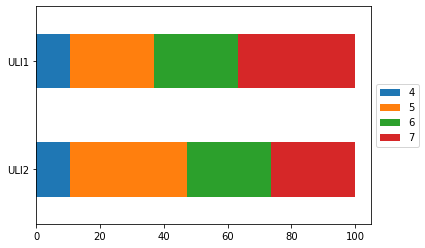

In [35]:
data_umux_lite_freq.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### Correlation

In [36]:
calculate_correlation(data_umux_lite);

Pearson's Correlation


,ULI1,ULI2
ULI1,1.000000,0.494934
ULI2,0.494934,1.000000


,ULI1,ULI2
ULI1,1.000000,0.031205
ULI2,0.031205,1.000000


Spearman's Correlation


,ULI1,ULI2
ULI1,1.000000,0.478907
ULI2,0.478907,1.000000


,ULI1,ULI2
ULI1,1.000000,0.038036
ULI2,0.038036,1.000000


Kendall Correlation


,ULI1,ULI2
ULI1,1.000000,0.395349
ULI2,0.395349,1.000000


,ULI1,ULI2
ULI1,1.000000,0.049152
ULI2,0.049152,1.000000


### SUS Conversion

In [37]:
data_umux_lite['SUS'] = 0.65 * ((data_umux_lite['ULI1'] + data_umux_lite['ULI2'] - 2) * (100/12))+22.9
data_umux_lite

,ULI1,ULI2,SUS
0,7,7,87.900000
1,4,6,66.233333
2,6,6,77.066667
3,7,7,87.900000
4,7,6,82.483333
5,6,7,82.483333
6,6,7,82.483333
7,6,7,82.483333
8,7,5,77.066667
9,7,6,82.483333


In [38]:
data_umux_lite['SUS'].describe()

count    19.000000
mean     74.785965
std       9.607827
min      55.400000
25%      66.233333
50%      77.066667
75%      82.483333
max      87.900000
Name: SUS, dtype: float64

## Semantic Differential Scales
- **SDS1:** Uninteresting/Interesting
- **SDS2:** Complex/Simple
- **SDS3:** Inappropriate/Appropriate
- **SDS4:** Hard to Understand/Easy to Understand
- **SDS5:** Hard to Learn/Easy to Learn
- **SDS6:** Hard to Develop/Easy to Develop

In [39]:
data_sds = data['Semantic Differential Scales']
data_sds

,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
0,7,5,7,7,7,7
1,5,6,6,7,7,7
2,7,2,6,3,6,2
3,7,6,7,6,7,7
4,7,6,7,6,6,6
5,7,7,7,7,7,5
6,7,7,7,7,7,7
7,7,6,6,6,6,6
8,7,5,6,5,5,5
9,7,4,7,4,6,6


--- Statistics ----


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.526316,4.842105,6.263158,5.157895,5.578947,5.315789
std,0.611775,1.424514,0.733493,1.384965,1.304513,1.376494
min,5.000000,2.000000,5.000000,3.000000,3.000000,2.000000
25%,6.000000,4.000000,6.000000,4.000000,5.000000,5.000000
50%,7.000000,5.000000,6.000000,5.000000,6.000000,5.000000
75%,7.000000,6.000000,7.000000,6.000000,6.500000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000




--- Counting Unique Values ----


SDS1  SDS2  SDS3  SDS4  SDS5  SDS6
5     6     6     7     7     7       1
7     4     7     4     6     6       1
      7     7     7     7     5       1
      6     7     6     7     7       1
                        6     6       1
                  5     6     6       1
            6     6     6     6       1
      5     7     7     7     7       1
            6     5     5     5       1
      4     7     4     3     3       1
6     2     5     3     5     5       1
7     2     6     3     6     2       1
6     5     6     6     6     6       1
            5     5     5     5       1
      4     6     5     6     5       1
                  4     3     4       1
                  3     4     4       1
            5     5     4     5       1
7     7     7     7     7     7       1
dtype: int64



--- Basic Histogram ----


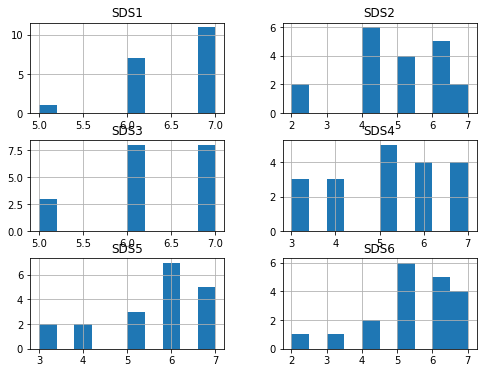

---- Question SDS1 ----
Population Standard Deviation:
0.5954583420518297
Confidence Interval (95%):
(6.231449538211795, 6.821182040735573)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.713, p=0.000
Sample does not look Gaussian (reject H0)


---- Question SDS2 ----
Population Standard Deviation:
1.3865199865599465
Confidence Interval (95%):
(4.155511555648746, 5.528698970667043)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.913, p=0.085
Sample looks Gaussian (fail to reject H0)


---- Question SDS3 ----
Population Standard Deviation:
0.7139294719079229
Confidence Interval (95%):
(5.9096256789961386, 6.616690110477546)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.793, p=0.001
Sample does not look Gaussian (reject H0)


---- Question SDS4 ----
Population Standard Deviation:
1.3480261552490207
Confidence Interval (95%):
(4.490362869488305, 5.825426604195906)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.906, p=0.063
Sample looks Gaussian (fail to reject H0)


---- Question SDS5 

In [40]:
print_stats(data_sds, hist_bins=10)
for column in data_sds:
    print('---- Question', column,'----')
    print('Population Standard Deviation:')
    print(data_sds[column].std(ddof=0))
    print('Confidence Interval (95%):')
    print(confidence_interval_t(data_sds[column]))
    print('Normality Tests:')
    normality_tests(data_sds[column])
    print('\n')

### Response Frequency

In [41]:
data_sds_freq = (data_sds.apply(pd.value_counts).fillna(0)/data_sds.count()*100).transpose()
data_sds_freq

,2,3,4,5,6,7
SDS1,0.000000,0.000000,0.000000,5.263158,36.842105,57.894737
SDS2,10.526316,0.000000,31.578947,21.052632,26.315789,10.526316
SDS3,0.000000,0.000000,0.000000,15.789474,42.105263,42.105263
SDS4,0.000000,15.789474,15.789474,26.315789,21.052632,21.052632
SDS5,0.000000,10.526316,10.526316,15.789474,36.842105,26.315789
SDS6,5.263158,5.263158,10.526316,31.578947,26.315789,21.052632


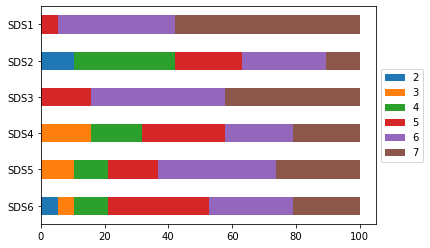

In [42]:
data_sds_freq.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### Correlation

In [43]:
calculate_correlation(data_sds);

Pearson's Correlation


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
SDS1,1.000000,0.228152,0.664640,0.093177,0.223493,-0.010417
SDS2,0.228152,1.000000,0.520504,0.858118,0.530260,0.678491
SDS3,0.664640,0.520504,1.000000,0.394330,0.412537,0.298291
SDS4,0.093177,0.858118,0.394330,1.000000,0.684584,0.759217
SDS5,0.223493,0.530260,0.412537,0.684584,1.000000,0.666000
SDS6,-0.010417,0.678491,0.298291,0.759217,0.666000,1.000000


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
SDS1,1.000000,0.347500,0.001907,0.704390,0.357701,0.966241
SDS2,0.347500,1.000000,0.022326,0.000003,0.019520,0.001406
SDS3,0.001907,0.022326,1.000000,0.094791,0.079211,0.214816
SDS4,0.704390,0.000003,0.094791,1.000000,0.001223,0.000163
SDS5,0.357701,0.019520,0.079211,0.001223,1.000000,0.001852
SDS6,0.966241,0.001406,0.214816,0.000163,0.001852,1.000000


Spearman's Correlation


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
SDS1,1.000000,0.341695,0.740277,0.179135,0.327374,0.171287
SDS2,0.341695,1.000000,0.503852,0.860079,0.667309,0.682813
SDS3,0.740277,0.503852,1.000000,0.394891,0.513340,0.410446
SDS4,0.179135,0.860079,0.394891,1.000000,0.769399,0.768725
SDS5,0.327374,0.667309,0.513340,0.769399,1.000000,0.765031
SDS6,0.171287,0.682813,0.410446,0.768725,0.765031,1.000000


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
SDS1,1.000000,0.152195,0.000290,0.463077,0.171259,0.483213
SDS2,0.152195,1.000000,0.027842,0.000002,0.001800,0.001274
SDS3,0.000290,0.027842,1.000000,0.094280,0.024583,0.080898
SDS4,0.463077,0.000002,0.094280,1.000000,0.000118,0.000120
SDS5,0.171259,0.001800,0.024583,0.000118,1.000000,0.000136
SDS6,0.483213,0.001274,0.080898,0.000120,0.000136,1.000000


Kendall Correlation


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
SDS1,1.000000,0.296946,0.678621,0.163014,0.300227,0.156640
SDS2,0.296946,1.000000,0.442399,0.783042,0.564137,0.584841
SDS3,0.678621,0.442399,1.000000,0.339775,0.455420,0.336615
SDS4,0.163014,0.783042,0.339775,1.000000,0.669342,0.688012
SDS5,0.300227,0.564137,0.455420,0.669342,1.000000,0.715405
SDS6,0.156640,0.584841,0.336615,0.688012,0.715405,1.000000


,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6
SDS1,1.000000,0.154903,0.002041,0.430759,0.151998,0.451640
SDS2,0.154903,1.000000,0.029832,0.000044,0.003675,0.002428
SDS3,0.002041,0.029832,1.000000,0.092317,0.025910,0.097314
SDS4,0.430759,0.000044,0.092317,1.000000,0.000508,0.000320
SDS5,0.151998,0.003675,0.025910,0.000508,1.000000,0.000220
SDS6,0.451640,0.002428,0.097314,0.000320,0.000220,1.000000


### Overall Pseudo-Semantic Differential Scale Score

In [44]:
data_sds_score = data_sds.mean(axis=1)
data_sds_score

0     6.666667
1     6.333333
2     4.333333
3     6.666667
4     6.333333
5     6.666667
6     7.000000
7     6.166667
8     5.500000
9     5.666667
10    5.833333
11    5.166667
12    4.500000
13    4.666667
14    6.166667
15    4.833333
16    4.500000
17    4.333333
18    5.333333
dtype: float64

In [45]:
data_sds_score.describe()

count    19.000000
mean      5.614035
std       0.897618
min       4.333333
25%       4.750000
50%       5.666667
75%       6.333333
max       7.000000
dtype: float64

## NPS

In [46]:
data_nps = data['NPS']
data_nps

,NPS
0,9
1,8
2,9
3,9
4,8
5,7
6,10
7,10
8,10
9,9


### Calculate NPS

In [47]:
nps_count = data_nps['NPS'].count()
nps_promoters = data_nps['NPS'][data_nps['NPS'] >= 9].count()
nps_detractors = data_nps['NPS'][data_nps['NPS'] <= 6].count()

nps_promoters_per = nps_promoters/nps_count*100
nps_detractors_per = nps_detractors/nps_count*100

nps_score = nps_promoters_per - nps_detractors_per
print('NPS Count', nps_count)
print('NPS Promoters', nps_promoters)
print('NPS Detractors', nps_detractors)
print('NPS Promoters (Percentage)', nps_promoters_per)
print('NPS Detractors (Percentage)', nps_detractors_per)

NPS Count 19
NPS Promoters 8
NPS Detractors 2
NPS Promoters (Percentage) 42.10526315789473
NPS Detractors (Percentage) 10.526315789473683


### General Stats

--- Statistics ----


count    19.000000
mean      8.105263
std       1.286457
min       6.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      10.000000
Name: NPS, dtype: float64



--- Counting Unique Values ----


9     5
7     5
8     4
10    3
6     2
Name: NPS, dtype: int64



--- Basic Bar Chart ----


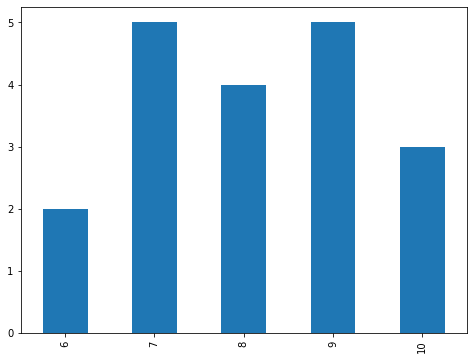

Population Standard Deviation:
1.2521449740389807
Confidence Interval (95%):
(7.485210891502685, 8.725315424286787)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.917, p=0.099
Sample looks Gaussian (fail to reject H0)




In [48]:
print_stats(data_nps['NPS'])
print('Population Standard Deviation:')
print(data_nps['NPS'].std(ddof=0))
print('Confidence Interval (95%):')
print(confidence_interval_t(data_nps['NPS']))
print('Normality Tests:')
normality_tests(data_nps['NPS'])
print('\n')

## NASA TLX

In [49]:
data_nasa_tlx = data['NASA TLX']
data_nasa_tlx['NASA TLX Score'] = data_nasa_tlx.mean(axis=1)
data_nasa_tlx

,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
0,60,20,35,10,30,15,28.333333
1,45,0,45,15,25,5,22.500000
2,75,35,50,30,70,35,49.166667
3,65,0,85,10,40,15,35.833333
4,15,5,5,10,90,0,20.833333
5,45,0,75,60,85,10,45.833333
6,10,0,10,15,35,5,12.500000
7,10,0,0,5,5,0,3.333333
8,30,0,5,25,10,10,13.333333


--- Statistics ----


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,39.444444,6.666667,34.444444,20.000000,43.333333,10.555556,25.740741
std,24.551533,12.500000,31.765198,16.955825,31.224990,10.736749,15.520173
min,10.000000,0.000000,0.000000,5.000000,5.000000,0.000000,3.333333
25%,15.000000,0.000000,5.000000,10.000000,25.000000,5.000000,13.333333
50%,45.000000,0.000000,35.000000,15.000000,35.000000,10.000000,22.500000
75%,60.000000,5.000000,50.000000,25.000000,70.000000,15.000000,35.833333
max,75.000000,35.000000,85.000000,60.000000,90.000000,35.000000,49.166667




--- Counting Unique Values ----


Mental Demand  Physical Demand  Temporal Demand  Performance  Effort  Frustration  NASA TLX Score
10             0                0                5            5       0            3.333333          1
                                10               15           35      5            12.500000         1
15             5                5                10           90      0            20.833333         1
30             0                5                25           10      10           13.333333         1
45             0                45               15           25      5            22.500000         1
                                75               60           85      10           45.833333         1
60             20               35               10           30      15           28.333333         1
65             0                85               10           40      15           35.833333         1
75             35               50               30           70      35      



--- Basic Histogram ----


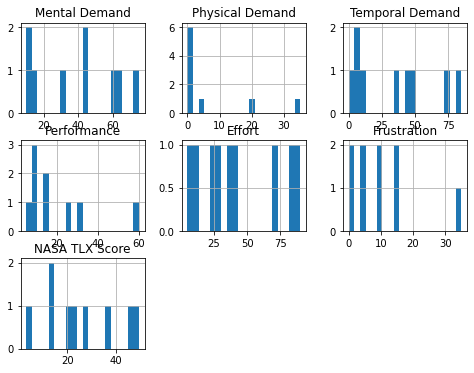

---- Question Mental Demand ----
Population Standard Deviation:
23.147407395555177
Confidence Interval (95%):
(20.572465491038614, 58.31642339785027)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.915, p=0.356
Sample looks Gaussian (fail to reject H0)


---- Question Physical Demand ----
Population Standard Deviation:
11.785113019775789
Confidence Interval (95%):
(-2.9416838959723757, 16.27501722930571)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.631, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Temporal Demand ----
Population Standard Deviation:
29.9485154932079
Confidence Interval (95%):
(10.027552115409936, 58.86133677347895)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.895, p=0.223
Sample looks Gaussian (fail to reject H0)


---- Question Performance ----
Population Standard Deviation:
15.986105077709064
Confidence Interval (95%):
(6.966599178126936, 33.033400821873066)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.778, p=0.012
Sample does not look Ga

In [50]:
print_stats(data_nasa_tlx, hist_bins=20)
for column in data_nasa_tlx:
    print('---- Question', column,'----')
    print('Population Standard Deviation:')
    print(data_nasa_tlx[column].std(ddof=0))
    print('Confidence Interval (95%):')
    print(confidence_interval_t(data_nasa_tlx[column]))
    print('Normality Tests:')
    normality_tests(data_nasa_tlx[column])
    print('\n')

### Correlation

In [51]:
calculate_correlation(data_nasa_tlx);

Pearson's Correlation


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
Mental Demand,1.000000,0.624537,0.780921,0.262737,0.206534,0.843016,0.828164
Physical Demand,0.624537,1.000000,0.128547,0.058977,0.288231,0.830481,0.545885
Temporal Demand,0.780921,0.128547,1.000000,0.464162,0.361271,0.495806,0.827086
Performance,0.262737,0.058977,0.464162,1.000000,0.513509,0.308980,0.625418
Effort,0.206534,0.288231,0.361271,0.513509,1.000000,0.236139,0.672424
Frustration,0.843016,0.830481,0.495806,0.308980,0.236139,1.000000,0.753610
NASA TLX Score,0.828164,0.545885,0.827086,0.625418,0.672424,0.753610,1.000000


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
Mental Demand,1.000000,0.072176,0.012982,0.494599,0.593923,0.004313,0.005829
Physical Demand,0.072176,1.000000,0.741705,0.880201,0.451968,0.005571,0.128411
Temporal Demand,0.012982,0.741705,1.000000,0.208158,0.339445,0.174661,0.005951
Performance,0.494599,0.880201,0.208158,1.000000,0.157366,0.418501,0.071656
Effort,0.593923,0.451968,0.339445,0.157366,1.000000,0.540739,0.047216
Frustration,0.004313,0.005571,0.174661,0.418501,0.540739,1.000000,0.019025
NASA TLX Score,0.005829,0.128411,0.005951,0.071656,0.047216,0.019025,1.000000


Spearman's Correlation


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
Mental Demand,1.000000,0.479282,0.793256,0.317623,0.310935,0.888921,0.907595
Physical Demand,0.479282,1.000000,0.044743,0.010114,0.405960,0.422971,0.455468
Temporal Demand,0.793256,0.044743,1.000000,0.444509,0.476992,0.697929,0.861932
Performance,0.317623,0.010114,0.444509,1.000000,0.323477,0.424246,0.519266
Effort,0.310935,0.405960,0.476992,0.323477,1.000000,0.186467,0.600000
Frustration,0.888921,0.422971,0.697929,0.424246,0.186467,1.000000,0.779773
NASA TLX Score,0.907595,0.455468,0.861932,0.519266,0.600000,0.779773,1.000000


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
Mental Demand,1.000000,0.191741,0.010737,0.404903,0.415407,0.001347,0.000721
Physical Demand,0.191741,1.000000,0.909001,0.979397,0.278308,0.256676,0.217938
Temporal Demand,0.010737,0.909001,1.000000,0.230618,0.194179,0.036559,0.002806
Performance,0.404903,0.979397,0.230618,1.000000,0.395807,0.255092,0.151965
Effort,0.415407,0.278308,0.194179,0.395807,1.000000,0.630967,0.087623
Frustration,0.001347,0.256676,0.036559,0.255092,0.630967,1.000000,0.013205
NASA TLX Score,0.000721,0.217938,0.002806,0.151965,0.087623,0.013205,1.000000


Kendall Correlation


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
Mental Demand,1.000000,0.411665,0.608760,0.242536,0.285831,0.788241,0.800327
Physical Demand,0.411665,1.000000,0.073771,0.000000,0.327327,0.347183,0.400066
Temporal Demand,0.608760,0.073771,1.000000,0.388449,0.366234,0.567734,0.647952
Performance,0.242536,0.000000,0.388449,1.000000,0.235702,0.375000,0.353553
Effort,0.285831,0.327327,0.366234,0.235702,1.000000,0.176777,0.500000
Frustration,0.788241,0.347183,0.567734,0.375000,0.176777,1.000000,0.648181
NASA TLX Score,0.800327,0.400066,0.647952,0.353553,0.500000,0.648181,1.000000


,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,NASA TLX Score
Mental Demand,1.000000,0.164104,0.026061,0.387094,0.291841,0.005110,0.003163
Physical Demand,0.164104,1.000000,0.801188,1.000000,0.259345,0.250475,0.168020
Temporal Demand,0.026061,0.801188,1.000000,0.162048,0.172955,0.041779,0.015906
Performance,0.387094,1.000000,0.162048,1.000000,0.391969,0.189843,0.199115
Effort,0.291841,0.259345,0.172955,0.391969,1.000000,0.522431,0.075176
Frustration,0.005110,0.250475,0.041779,0.189843,0.522431,1.000000,0.019016
NASA TLX Score,0.003163,0.168020,0.015906,0.199115,0.075176,0.019016,1.000000


## SEQ Exercises

In [52]:
data_seq = data['SEQ']
data_seq

,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
0,6,6,7,7,7,7,6,7,6,7,7
1,6,6,7,7,7,7,7,7,7,7,7
2,6,5,7,7,7,7,7,7,6,7,7
3,6,5,6,7,6,7,5,7,4,6,7
4,6,5,7,7,7,7,6,7,5,7,7
5,3,2,3,7,6,7,4,7,1,7,6
6,7,6,7,7,7,6,7,7,6,7,7
7,6,6,6,7,7,7,6,7,6,7,7
8,5,5,6,7,7,7,6,7,6,7,7


--- Statistics ----


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
count,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.0,9.0,9.000000,9.000000,9.000000
mean,5.666667,5.111111,6.222222,7.0,6.777778,6.888889,6.0,7.0,5.222222,6.888889,6.888889
std,1.118034,1.269296,1.301708,0.0,0.440959,0.333333,1.0,0.0,1.787301,0.333333,0.333333
min,3.000000,2.000000,3.000000,7.0,6.000000,6.000000,4.0,7.0,1.000000,6.000000,6.000000
25%,6.000000,5.000000,6.000000,7.0,7.000000,7.000000,6.0,7.0,5.000000,7.000000,7.000000
50%,6.000000,5.000000,7.000000,7.0,7.000000,7.000000,6.0,7.0,6.000000,7.000000,7.000000
75%,6.000000,6.000000,7.000000,7.0,7.000000,7.000000,7.0,7.0,6.000000,7.000000,7.000000
max,7.000000,6.000000,7.000000,7.0,7.000000,7.000000,7.0,7.0,7.000000,7.000000,7.000000




--- Counting Unique Values ----


Exercise 1  Exercise 2  Exercise 3  Exercise 4  Exercise 5  Exercise 6  Exercise 7  Exercise 8  Exercise 9  Exercise 10  Exercise 11
3           2           3           7           6           7           4           7           1           7            6              1
5           5           6           7           7           7           6           7           6           7            7              1
6           5           6           7           6           7           5           7           4           6            7              1
                        7           7           7           7           6           7           5           7            7              1
                                                                        7           7           6           7            7              1
            6           6           7           7           7           6           7           6           7            7              1
                        7           7  



--- Basic Histogram ----


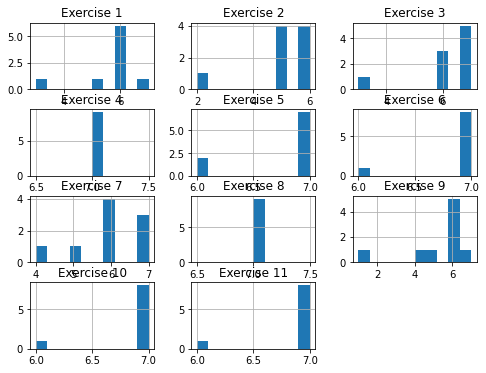

---- Question Exercise 1 ----
Population Standard Deviation:
1.0540925533894598
Confidence Interval (95%):
(4.807269666278297, 6.526063667055037)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.718, p=0.002
Sample does not look Gaussian (reject H0)


---- Question Exercise 2 ----
Population Standard Deviation:
1.1967032904743342
Confidence Interval (95%):
(4.135444207022327, 6.0867780151998945)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.685, p=0.001
Sample does not look Gaussian (reject H0)


---- Question Exercise 3 ----
Population Standard Deviation:
1.227262335243029
Confidence Interval (95%):
(5.221640663984234, 7.222803780460211)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.652, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 4 ----
Population Standard Deviation:
0.0
Confidence Interval (95%):
(nan, nan)
Normality Tests:
Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 5 ----
Populatio

/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [53]:
print_stats(data_seq, hist_bins=10)
for column in data_seq:
    print('---- Question', column,'----')
    print('Population Standard Deviation:')
    print(data_seq[column].std(ddof=0))
    print('Confidence Interval (95%):')
    print(confidence_interval_t(data_seq[column]))
    print('Normality Tests:')
    normality_tests(data_seq[column])
    print('\n')

### Response Frequency

In [54]:
data_seq_freq = (data_seq.apply(pd.value_counts).fillna(0)/data_seq.count()*100).transpose()
data_seq_freq

,1,2,3,4,5,6,7
Exercise 1,0.000000,0.000000,11.111111,0.000000,11.111111,66.666667,11.111111
Exercise 2,0.000000,11.111111,0.000000,0.000000,44.444444,44.444444,0.000000
Exercise 3,0.000000,0.000000,11.111111,0.000000,0.000000,33.333333,55.555556
Exercise 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
Exercise 5,0.000000,0.000000,0.000000,0.000000,0.000000,22.222222,77.777778
Exercise 6,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,88.888889
Exercise 7,0.000000,0.000000,0.000000,11.111111,11.111111,44.444444,33.333333
Exercise 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
Exercise 9,11.111111,0.000000,0.000000,11.111111,11.111111,55.555556,11.111111
Exercise 10,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,88.888889


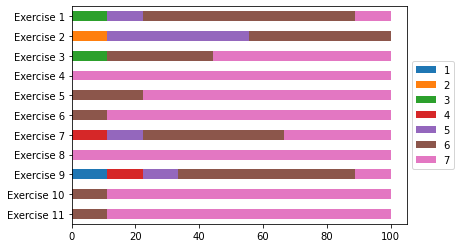

In [55]:
data_seq_freq.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

### Correlation

In [56]:
calculate_correlation(data_seq);

Pearson's Correlation


/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
Exercise 1,1.000000,0.910191,0.916157,NaN,0.591608,-0.447214,0.782624,NaN,0.792355,-0.111803,0.894427
Exercise 2,0.910191,1.000000,0.891039,NaN,0.719623,-0.262613,0.787839,NaN,0.924451,0.032827,0.919145
Exercise 3,0.916157,0.891039,1.000000,NaN,0.750098,-0.224065,0.864249,NaN,0.889493,0.064018,0.928267
Exercise 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise 5,0.591608,0.719623,0.750098,NaN,1.000000,-0.188982,0.850420,NaN,0.863512,0.661438,0.661438
Exercise 6,-0.447214,-0.262613,-0.224065,NaN,-0.188982,1.000000,-0.375000,NaN,-0.163188,-0.125000,-0.125000
Exercise 7,0.782624,0.787839,0.864249,NaN,0.850420,-0.375000,1.000000,NaN,0.909192,0.375000,0.750000
Exercise 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise 9,0.792355,0.924451,0.889493,NaN,0.863512,-0.163188,0.909192,NaN,1.000000,0.256439,0.885880
Exercise 10,-0.111803,0.032827,0.064018,NaN,0.661438,-0.125000,0.375000,NaN,0.256439,1.000000,-0.125000


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
Exercise 1,1.000000,0.000654,0.000517,nan,0.093335,0.227453,0.012654,nan,0.010891,0.774595,0.001134
Exercise 2,0.000654,1.000000,0.001262,nan,0.028835,0.494810,0.011687,nan,0.000362,0.933186,0.000457
Exercise 3,0.000517,0.001262,1.000000,nan,0.019917,0.562208,0.002651,nan,0.001324,0.870027,0.000303
Exercise 4,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan
Exercise 5,0.093335,0.028835,0.019917,nan,1.000000,0.626283,0.003670,nan,0.002700,0.052356,0.052356
Exercise 6,0.227453,0.494810,0.562208,nan,0.626283,1.000000,0.320012,nan,0.674845,0.748645,0.748645
Exercise 7,0.012654,0.011687,0.002651,nan,0.003670,0.320012,1.000000,nan,0.000679,0.320012,0.019942
Exercise 8,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
Exercise 9,0.010891,0.000362,0.001324,nan,0.002700,0.674845,0.000679,nan,1.000000,0.505375,0.001476
Exercise 10,0.774595,0.933186,0.870027,nan,0.052356,0.748645,0.320012,nan,0.505375,1.000000,0.748645


Spearman's Correlation


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
Exercise 1,1.000000,0.694177,0.708492,NaN,0.430458,-0.650791,0.637372,NaN,0.390475,-0.081349,0.650791
Exercise 2,0.694177,1.000000,0.530723,NaN,0.623641,-0.375000,0.582772,NaN,0.760000,0.225000,0.600000
Exercise 3,0.708492,0.530723,1.000000,NaN,0.694365,-0.306186,0.793052,NaN,0.571548,0.306186,0.612372
Exercise 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise 5,0.430458,0.623641,0.694365,NaN,1.000000,-0.188982,0.770934,NaN,0.793725,0.661438,0.661438
Exercise 6,-0.650791,-0.375000,-0.306186,NaN,-0.188982,1.000000,-0.437079,NaN,-0.150000,-0.125000,-0.125000
Exercise 7,0.637372,0.582772,0.793052,NaN,0.770934,-0.437079,1.000000,NaN,0.825593,0.437079,0.582772
Exercise 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise 9,0.390475,0.760000,0.571548,NaN,0.793725,-0.150000,0.825593,NaN,1.000000,0.450000,0.600000
Exercise 10,-0.081349,0.225000,0.306186,NaN,0.661438,-0.125000,0.437079,NaN,0.450000,1.000000,-0.125000


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
Exercise 1,1.000000,0.038017,0.032649,nan,0.247448,0.057665,0.064826,nan,0.298796,0.835189,0.057665
Exercise 2,0.038017,1.000000,0.141541,nan,0.072707,0.320012,0.099591,nan,0.017472,0.560533,0.087623
Exercise 3,0.032649,0.141541,1.000000,nan,0.037943,0.422941,0.010772,nan,0.107895,0.422941,0.079602
Exercise 4,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan
Exercise 5,0.247448,0.072707,0.037943,nan,1.000000,0.626283,0.015014,nan,0.010657,0.052356,0.052356
Exercise 6,0.057665,0.320012,0.422941,nan,0.626283,1.000000,0.239439,nan,0.700094,0.748645,0.748645
Exercise 7,0.064826,0.099591,0.010772,nan,0.015014,0.239439,1.000000,nan,0.006123,0.239439,0.099591
Exercise 8,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
Exercise 9,0.298796,0.017472,0.107895,nan,0.010657,0.700094,0.006123,nan,1.000000,0.224216,0.087623
Exercise 10,0.835189,0.560533,0.422941,nan,0.052356,0.748645,0.239439,nan,0.224216,1.000000,0.748645


Kendall Correlation


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
Exercise 1,1.000000,0.668153,0.682524,NaN,0.408248,-0.617213,0.587945,NaN,0.342368,-0.077152,0.617213
Exercise 2,0.668153,1.000000,0.510754,NaN,0.600099,-0.360844,0.549972,NaN,0.720577,0.216506,0.577350
Exercise 3,0.682524,0.510754,1.000000,NaN,0.668734,-0.294884,0.762444,NaN,0.531610,0.294884,0.589768
Exercise 4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exercise 5,0.408248,0.600099,0.668734,NaN,1.000000,-0.188982,0.720082,NaN,0.733799,0.661438,0.661438
Exercise 6,-0.617213,-0.360844,-0.294884,NaN,-0.188982,1.000000,-0.408248,NaN,-0.138675,-0.125000,-0.125000
Exercise 7,0.587945,0.549972,0.762444,NaN,0.720082,-0.408248,1.000000,NaN,0.792594,0.408248,0.544331
Exercise 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Exercise 9,0.342368,0.720577,0.531610,NaN,0.733799,-0.138675,0.792594,NaN,1.000000,0.416025,0.554700
Exercise 10,-0.077152,0.216506,0.294884,NaN,0.661438,-0.125000,0.408248,NaN,0.416025,1.000000,-0.125000


,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,Exercise 11
Exercise 1,1.000000,0.038624,0.034783,nan,0.223407,0.065663,0.061084,nan,0.270703,0.818022,0.065663
Exercise 2,0.038624,1.000000,0.119362,nan,0.077745,0.288844,0.084014,nan,0.022220,0.524518,0.089686
Exercise 3,0.034783,0.119362,1.000000,nan,0.049535,0.386476,0.016693,nan,0.091882,0.386476,0.083265
Exercise 4,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan
Exercise 5,0.223407,0.077745,0.049535,nan,1.000000,0.592980,0.029218,nan,0.024768,0.061369,0.061369
Exercise 6,0.065663,0.288844,0.386476,nan,0.592980,1.000000,0.216367,nan,0.671373,0.723674,0.723674
Exercise 7,0.061084,0.084014,0.016693,nan,0.029218,0.216367,1.000000,nan,0.009683,0.216367,0.099286
Exercise 8,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
Exercise 9,0.270703,0.022220,0.091882,nan,0.024768,0.671373,0.009683,nan,1.000000,0.203092,0.089686
Exercise 10,0.818022,0.524518,0.386476,nan,0.061369,0.723674,0.216367,nan,0.203092,1.000000,0.723674


### Overall Pseudo-SEQ Score

In [57]:
data_seq_score = data_seq.mean(axis=1)
data_seq_score

0    6.636364
1    6.818182
2    6.636364
3    6.000000
4    6.454545
5    4.818182
6    6.727273
7    6.545455
8    6.363636
dtype: float64

In [58]:
data_seq_score.describe()

count    9.000000
mean     6.333333
std      0.616575
min      4.818182
25%      6.363636
50%      6.545455
75%      6.636364
max      6.818182
dtype: float64

## Exercises

In [59]:
data_exercises = data['Exercises'].copy()

data_exercises_times = data_exercises.select_dtypes(include='object')
data_exercises_times = data_exercises_times.applymap(convert_time_to_timedelta, na_action='ignore')
data_exercises_times = data_exercises_times / np.timedelta64(1, 's')

data_exercises[data_exercises_times.columns] = data_exercises_times[data_exercises_times.columns]

display(data_exercises)
display(data_exercises.describe())
for column in data_exercises:
    print('---- Question', column,'----')
    print('Population Standard Deviation:')
    print(data_exercises[column].std(ddof=0))
    print('Confidence Interval (95%):')
    print(confidence_interval_t(data_exercises[column]))
    print('Normality Tests:')
    normality_tests(data_exercises[column])
    print('\n')

,Exercise 1 Total Time,Exercise 1 Time First Needed Help,Exercise 1 Times Needed Help,Exercise 1 Number of Errors,Exercise 2 Total Time,Exercise 2 Time First Needed Help,Exercise 2 Times Needed Help,Exercise 2 Number of Errors,Exercise 3 Total Time,Exercise 3 Time First Needed Help,...,Exercise 9 Times Needed Help,Exercise 9 Number of Errors,Exercise 10 Total Time,Exercise 10 Time First Needed Help,Exercise 10 Times Needed Help,Exercise 10 Number of Errors,Exercise 11 Total Time,Exercise 11 Time First Needed Help,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
0,86.0,NaN,0,0,336.0,154.0,5,1,48.0,32.0,...,2,1,39.0,NaN,0,0,11.0,NaN,0,0
1,201.0,144.0,1,2,255.0,40.0,3,3,30.0,NaN,...,2,2,31.0,NaN,0,0,20.0,NaN,0,0
2,176.0,93.0,2,0,280.0,13.0,7,5,88.0,17.0,...,1,0,46.0,12.0,1,1,30.0,16.0,1,1
3,104.0,NaN,3,0,358.0,33.0,8,3,12.0,30.0,...,3,1,64.0,37.0,1,1,25.0,NaN,0,0
4,133.0,49.0,3,1,284.0,43.0,5,3,92.0,39.0,...,1,0,38.0,NaN,0,0,24.0,NaN,0,0
5,250.0,51.0,4,0,285.0,74.0,5,2,110.0,33.0,...,4,2,83.0,21.0,2,1,32.0,21.0,1,1
6,169.0,62.0,2,1,196.0,21.0,3,2,82.0,39.0,...,4,0,31.0,31.0,1,1,25.0,NaN,0,0
7,130.0,62.0,1,0,243.0,105.0,5,2,190.0,40.0,...,2,1,58.0,NaN,0,0,32.0,32.0,1,0
8,107.0,217.0,3,0,259.0,14.0,4,3,133.0,97.0,...,3,0,78.0,55.0,1,1,34.0,NaN,0,0


,Exercise 1 Total Time,Exercise 1 Time First Needed Help,Exercise 1 Times Needed Help,Exercise 1 Number of Errors,Exercise 2 Total Time,Exercise 2 Time First Needed Help,Exercise 2 Times Needed Help,Exercise 2 Number of Errors,Exercise 3 Total Time,Exercise 3 Time First Needed Help,...,Exercise 9 Times Needed Help,Exercise 9 Number of Errors,Exercise 10 Total Time,Exercise 10 Time First Needed Help,Exercise 10 Times Needed Help,Exercise 10 Number of Errors,Exercise 11 Total Time,Exercise 11 Time First Needed Help,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
count,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,...,9.000000,9.000000,9.00000,5.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000
mean,150.666667,96.857143,2.111111,0.444444,277.333333,55.222222,5.000000,2.666667,87.222222,40.875000,...,2.444444,0.777778,52.00000,31.200000,0.666667,0.555556,25.888889,23.000000,0.333333,0.222222
std,52.896125,62.576429,1.269296,0.726483,48.332184,47.586179,1.658312,1.118034,54.428342,23.865322,...,1.130388,0.833333,19.68502,16.376813,0.707107,0.527046,7.236098,8.185353,0.500000,0.440959
min,86.000000,49.000000,0.000000,0.000000,196.000000,13.000000,3.000000,1.000000,12.000000,17.000000,...,1.000000,0.000000,31.00000,12.000000,0.000000,0.000000,11.000000,16.000000,0.000000,0.000000
25%,107.000000,56.500000,1.000000,0.000000,255.000000,21.000000,4.000000,2.000000,48.000000,31.500000,...,2.000000,0.000000,38.00000,21.000000,0.000000,0.000000,24.000000,18.500000,0.000000,0.000000
50%,133.000000,62.000000,2.000000,0.000000,280.000000,40.000000,5.000000,3.000000,88.000000,36.000000,...,2.000000,1.000000,46.00000,31.000000,1.000000,1.000000,25.000000,21.000000,0.000000,0.000000
75%,176.000000,118.500000,3.000000,1.000000,285.000000,74.000000,5.000000,3.000000,110.000000,39.250000,...,3.000000,1.000000,64.00000,37.000000,1.000000,1.000000,32.000000,26.500000,1.000000,0.000000
max,250.000000,217.000000,4.000000,2.000000,358.000000,154.000000,8.000000,5.000000,190.000000,97.000000,...,4.000000,2.000000,83.00000,55.000000,2.000000,1.000000,34.000000,32.000000,1.000000,1.000000


---- Question Exercise 1 Total Time ----
Population Standard Deviation:
49.870944558040115
Confidence Interval (95%):
(110.0071059649992, 191.32622736833412)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.944, p=0.627
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 1 Time First Needed Help ----
Population Standard Deviation:
57.93451616493665
Confidence Interval (95%):
(38.98359818292664, 154.73068753135908)
Normality Tests:
Shapiro-Wilk Test
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 1 Times Needed Help ----
Population Standard Deviation:
1.1967032904743342
Confidence Interval (95%):
(1.1354442070223274, 3.086778015199895)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.948, p=0.663
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 1 Number of Errors ----
Population Standard Deviation:
0.6849348892187752
Confidence Interval (95%):
(-0.11397994377763243, 1.0028688326665214)
Normality Tests:
Shapiro-Wil

/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [60]:
data_exercises_seq = pd.concat([data_seq, data_exercises], axis=1)
data_exercises_seq

,Exercise 1,Exercise 2,Exercise 3,Exercise 4,Exercise 5,Exercise 6,Exercise 7,Exercise 8,Exercise 9,Exercise 10,...,Exercise 9 Times Needed Help,Exercise 9 Number of Errors,Exercise 10 Total Time,Exercise 10 Time First Needed Help,Exercise 10 Times Needed Help,Exercise 10 Number of Errors,Exercise 11 Total Time,Exercise 11 Time First Needed Help,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
0,6,6,7,7,7,7,6,7,6,7,...,2,1,39.0,NaN,0,0,11.0,NaN,0,0
1,6,6,7,7,7,7,7,7,7,7,...,2,2,31.0,NaN,0,0,20.0,NaN,0,0
2,6,5,7,7,7,7,7,7,6,7,...,1,0,46.0,12.0,1,1,30.0,16.0,1,1
3,6,5,6,7,6,7,5,7,4,6,...,3,1,64.0,37.0,1,1,25.0,NaN,0,0
4,6,5,7,7,7,7,6,7,5,7,...,1,0,38.0,NaN,0,0,24.0,NaN,0,0
5,3,2,3,7,6,7,4,7,1,7,...,4,2,83.0,21.0,2,1,32.0,21.0,1,1
6,7,6,7,7,7,6,7,7,6,7,...,4,0,31.0,31.0,1,1,25.0,NaN,0,0
7,6,6,6,7,7,7,6,7,6,7,...,2,1,58.0,NaN,0,0,32.0,32.0,1,0
8,5,5,6,7,7,7,6,7,6,7,...,3,0,78.0,55.0,1,1,34.0,NaN,0,0


[-------------------------------- [Exercise 1] --------------------------------]


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
0,6,86.0,0,0
1,6,201.0,1,2
2,6,176.0,2,0
3,6,104.0,3,0
4,6,133.0,3,1
5,3,250.0,4,0
6,7,169.0,2,1
7,6,130.0,1,0
8,5,107.0,3,0


Correlations:
Pearson's Correlation


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
Exercise 1,1.000000,-0.498819,-0.587220,0.359092
Exercise 1 Total Time,-0.498819,1.000000,0.354355,0.329620
Exercise 1 Times Needed Help,-0.587220,0.354355,1.000000,-0.195804
Exercise 1 Number of Errors,0.359092,0.329620,-0.195804,1.000000


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
Exercise 1,1.000000,0.171645,0.096411,0.342581
Exercise 1 Total Time,0.171645,1.000000,0.349448,0.386369
Exercise 1 Times Needed Help,0.096411,0.349448,1.000000,0.613636
Exercise 1 Number of Errors,0.342581,0.386369,0.613636,1.000000


Spearman's Correlation


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
Exercise 1,1.000000,-0.148522,-0.543490,0.491133
Exercise 1 Total Time,-0.148522,1.000000,0.265044,0.408370
Exercise 1 Times Needed Help,-0.543490,0.265044,1.000000,-0.158394
Exercise 1 Number of Errors,0.491133,0.408370,-0.158394,1.000000


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
Exercise 1,1.000000,0.702940,0.130434,0.179400
Exercise 1 Total Time,0.702940,1.000000,0.490674,0.275189
Exercise 1 Times Needed Help,0.130434,0.490674,1.000000,0.683992
Exercise 1 Number of Errors,0.179400,0.275189,0.683992,1.000000


Kendall Correlation


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
Exercise 1,1.000000,-0.109109,-0.470317,0.439155
Exercise 1 Total Time,-0.109109,1.000000,0.149671,0.372678
Exercise 1 Times Needed Help,-0.470317,0.149671,1.000000,-0.160644
Exercise 1 Number of Errors,0.439155,0.372678,-0.160644,1.000000


,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
Exercise 1,1.000000,0.706931,0.122086,0.175699
Exercise 1 Total Time,0.706931,1.000000,0.590493,0.206507
Exercise 1 Times Needed Help,0.122086,0.590493,1.000000,0.603703
Exercise 1 Number of Errors,0.175699,0.206507,0.603703,1.000000


---- Question Exercise 1 ----
Population Standard Deviation:
1.0540925533894598
Confidence Interval (95%):
(4.807269666278297, 6.526063667055037)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.718, p=0.002
Sample does not look Gaussian (reject H0)


---- Question Exercise 1 Total Time ----
Population Standard Deviation:
49.870944558040115
Confidence Interval (95%):
(110.0071059649992, 191.32622736833412)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.944, p=0.627
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 1 Times Needed Help ----
Population Standard Deviation:
1.1967032904743342
Confidence Interval (95%):
(1.1354442070223274, 3.086778015199895)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.948, p=0.663
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 1 Number of Errors ----
Population Standard Deviation:
0.6849348892187752
Confidence Interval (95%):
(-0.11397994377763243, 1.0028688326665214)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.6

,Exercise 1,Exercise 1 Total Time,Exercise 1 Times Needed Help,Exercise 1 Number of Errors
0,0.641936,0.463500,0.579948,0.191693
1,0.119861,0.582184,0.067753,0.801314
2,0.385971,0.359933,0.804732,0.271812
3,0.651596,0.562741,0.107133,0.497260


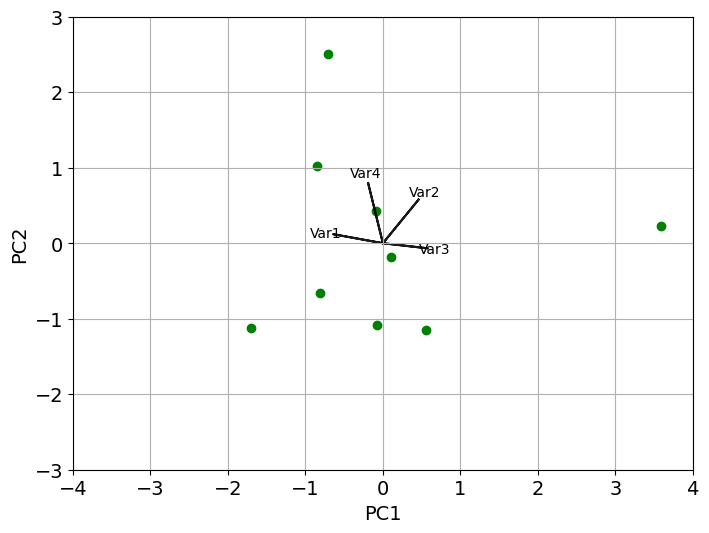

[-------------------------------- [Exercise 2] --------------------------------]


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
0,6,336.0,5,1
1,6,255.0,3,3
2,5,280.0,7,5
3,5,358.0,8,3
4,5,284.0,5,3
5,2,285.0,5,2
6,6,196.0,3,2
7,6,243.0,5,2
8,5,259.0,4,3


Correlations:
Pearson's Correlation


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
Exercise 2,1.000000,-0.208511,-0.237542,-0.058722
Exercise 2 Total Time,-0.208511,1.000000,0.737681,-0.009253
Exercise 2 Times Needed Help,-0.237542,0.737681,1.000000,0.404520
Exercise 2 Number of Errors,-0.058722,-0.009253,0.404520,1.000000


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
Exercise 2,1.000000,0.590316,0.538264,0.880716
Exercise 2 Total Time,0.590316,1.000000,0.023290,0.981151
Exercise 2 Times Needed Help,0.538264,0.023290,1.000000,0.280183
Exercise 2 Number of Errors,0.880716,0.981151,0.280183,1.000000


Spearman's Correlation


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
Exercise 2,1.000000,-0.529465,-0.483702,-0.407940
Exercise 2 Total Time,-0.529465,1.000000,0.708241,0.017733
Exercise 2 Times Needed Help,-0.483702,0.708241,1.000000,0.251187
Exercise 2 Number of Errors,-0.407940,0.017733,0.251187,1.000000


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
Exercise 2,1.000000,0.142665,0.187084,0.275744
Exercise 2 Total Time,0.142665,1.000000,0.032739,0.963884
Exercise 2 Times Needed Help,0.187084,0.032739,1.000000,0.514433
Exercise 2 Number of Errors,0.275744,0.963884,0.514433,1.000000


Kendall Correlation


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
Exercise 2,1.000000,-0.476290,-0.416954,-0.353553
Exercise 2 Total Time,-0.476290,1.000000,0.588035,0.032075
Exercise 2 Times Needed Help,-0.416954,0.588035,1.000000,0.178685
Exercise 2 Number of Errors,-0.353553,0.032075,0.178685,1.000000


,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
Exercise 2,1.000000,0.105193,0.180892,0.266669
Exercise 2 Total Time,0.105193,1.000000,0.036265,0.910794
Exercise 2 Times Needed Help,0.180892,0.036265,1.000000,0.555439
Exercise 2 Number of Errors,0.266669,0.910794,0.555439,1.000000


---- Question Exercise 2 ----
Population Standard Deviation:
1.1967032904743342
Confidence Interval (95%):
(4.135444207022327, 6.0867780151998945)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.685, p=0.001
Sample does not look Gaussian (reject H0)


---- Question Exercise 2 Total Time ----
Population Standard Deviation:
45.56801997502683
Confidence Interval (95%):
(240.18192802812345, 314.48473863854315)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.959, p=0.784
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 2 Times Needed Help ----
Population Standard Deviation:
1.5634719199411433
Confidence Interval (95%):
(3.725308253181044, 6.274691746818956)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.896, p=0.227
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 2 Number of Errors ----
Population Standard Deviation:
1.0540925533894598
Confidence Interval (95%):
(1.8072696662782963, 3.5260636670550367)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.883

,Exercise 2,Exercise 2 Total Time,Exercise 2 Times Needed Help,Exercise 2 Number of Errors
0,0.319355,0.593765,0.673712,0.302603
1,0.305383,0.376350,0.085449,0.870518
2,0.896780,0.355554,0.192480,0.179774
3,0.023218,0.615943,0.708352,0.343966


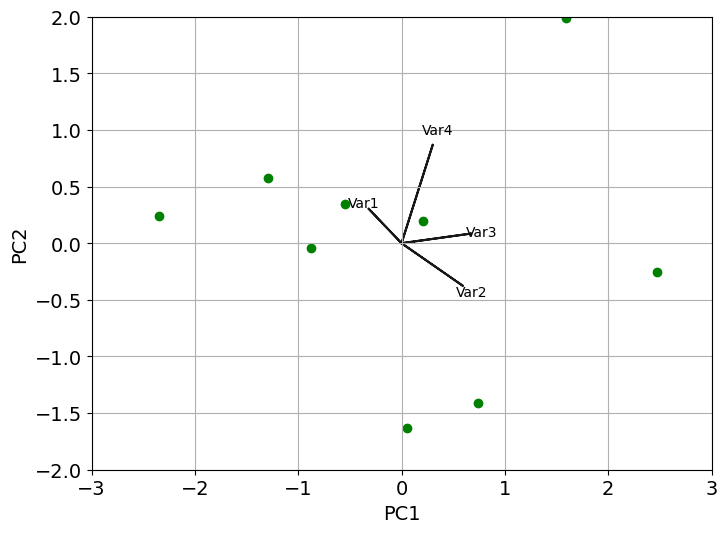

[-------------------------------- [Exercise 3] --------------------------------]


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
0,7,48.0,1,1
1,7,30.0,0,0
2,7,88.0,3,1
3,6,12.0,1,0
4,7,92.0,1,0
5,3,110.0,3,2
6,7,82.0,1,1
7,6,190.0,3,0
8,6,133.0,1,0


Correlations:
Pearson's Correlation


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
Exercise 3,1.000000,-0.290129,-0.519145,-0.543413
Exercise 3 Total Time,-0.290129,1.000000,0.629598,0.005971
Exercise 3 Times Needed Help,-0.519145,0.629598,1.000000,0.490470
Exercise 3 Number of Errors,-0.543413,0.005971,0.490470,1.000000


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
Exercise 3,1.000000,0.448860,0.152077,0.130500
Exercise 3 Total Time,0.448860,1.000000,0.069219,0.987836
Exercise 3 Times Needed Help,0.152077,0.069219,1.000000,0.180079
Exercise 3 Number of Errors,0.130500,0.987836,0.180079,1.000000


Spearman's Correlation


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
Exercise 3,1.000000,-0.447214,-0.458333,0.000000
Exercise 3 Total Time,-0.447214,1.000000,0.614919,0.000000
Exercise 3 Times Needed Help,-0.458333,0.614919,1.000000,0.458333
Exercise 3 Number of Errors,0.000000,0.000000,0.458333,1.000000


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
Exercise 3,1.000000,0.227453,0.214687,1.000000
Exercise 3 Total Time,0.227453,1.000000,0.078010,1.000000
Exercise 3 Times Needed Help,0.214687,0.078010,1.000000,0.214687
Exercise 3 Number of Errors,1.000000,1.000000,0.214687,1.000000


Kendall Correlation


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
Exercise 3,1.000000,-0.312772,-0.434783,0.043478
Exercise 3 Total Time,-0.312772,1.000000,0.521286,0.034752
Exercise 3 Times Needed Help,-0.434783,0.521286,1.000000,0.434783
Exercise 3 Number of Errors,0.043478,0.034752,0.434783,1.000000


,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
Exercise 3,1.000000,0.287726,0.185280,0.894615
Exercise 3 Total Time,0.287726,1.000000,0.076416,0.905969
Exercise 3 Times Needed Help,0.185280,0.076416,1.000000,0.185280
Exercise 3 Number of Errors,0.894615,0.905969,0.185280,1.000000


---- Question Exercise 3 ----
Population Standard Deviation:
1.227262335243029
Confidence Interval (95%):
(5.221640663984234, 7.222803780460211)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.652, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 3 Total Time ----
Population Standard Deviation:
51.31553322939638
Confidence Interval (95%):
(45.38489476092195, 129.0595496835225)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.967, p=0.872
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 3 Times Needed Help ----
Population Standard Deviation:
1.0657403385139377
Confidence Interval (95%):
(0.6866621674306844, 2.4244489436804266)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.773, p=0.010
Sample does not look Gaussian (reject H0)


---- Question Exercise 3 Number of Errors ----
Population Standard Deviation:
0.6849348892187752
Confidence Interval (95%):
(-0.0028688326665212704, 1.1139799437776325)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.7

,Exercise 3,Exercise 3 Total Time,Exercise 3 Times Needed Help,Exercise 3 Number of Errors
0,0.525920,0.412495,0.590522,0.452261
1,0.266767,0.717144,0.204266,0.610586
2,0.803403,0.025646,0.388205,0.450758
3,0.082389,0.561155,0.677389,0.468467


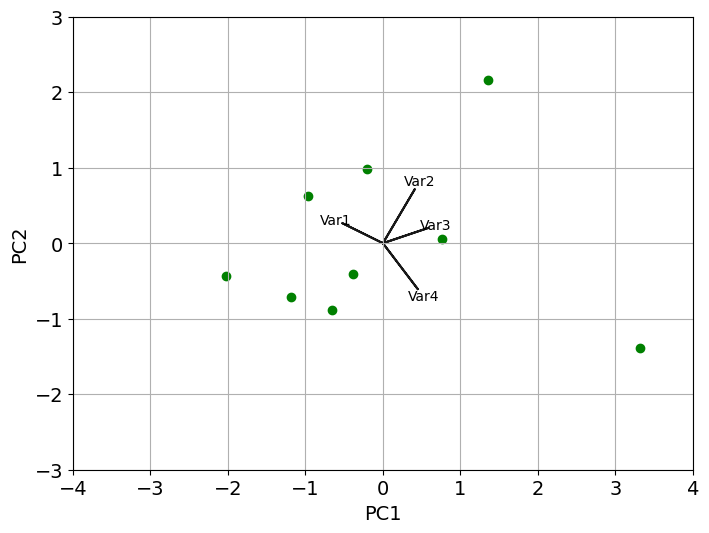

[-------------------------------- [Exercise 4] --------------------------------]


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
0,7,61.0,0,1
1,7,17.0,0,0
2,7,21.0,0,0
3,7,8.0,0,0
4,7,63.0,0,0
5,7,21.0,0,0
6,7,16.0,0,0
7,7,12.0,0,0
8,7,45.0,0,0


Correlations:
Pearson's Correlation


/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
Exercise 4,NaN,NaN,NaN,NaN
Exercise 4 Total Time,NaN,1.000000,NaN,0.559327
Exercise 4 Times Needed Help,NaN,NaN,NaN,NaN
Exercise 4 Number of Errors,NaN,0.559327,NaN,1.000000


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
Exercise 4,1.000000,nan,nan,nan
Exercise 4 Total Time,nan,1.000000,nan,0.117398
Exercise 4 Times Needed Help,nan,nan,1.000000,nan
Exercise 4 Number of Errors,nan,0.117398,nan,1.000000


Spearman's Correlation


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
Exercise 4,NaN,NaN,NaN,NaN
Exercise 4 Total Time,NaN,1.000000,NaN,0.412514
Exercise 4 Times Needed Help,NaN,NaN,NaN,NaN
Exercise 4 Number of Errors,NaN,0.412514,NaN,1.000000


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
Exercise 4,1.000000,nan,nan,nan
Exercise 4 Total Time,nan,1.000000,nan,0.269865
Exercise 4 Times Needed Help,nan,nan,1.000000,nan
Exercise 4 Number of Errors,nan,0.269865,nan,1.000000


Kendall Correlation


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
Exercise 4,1.0,NaN,NaN,NaN
Exercise 4 Total Time,NaN,1.000000,NaN,0.358569
Exercise 4 Times Needed Help,NaN,NaN,1.0,NaN
Exercise 4 Number of Errors,NaN,0.358569,NaN,1.000000


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
Exercise 4,1.000000,nan,nan,nan
Exercise 4 Total Time,nan,1.000000,nan,0.243305
Exercise 4 Times Needed Help,nan,nan,1.000000,nan
Exercise 4 Number of Errors,nan,0.243305,nan,1.000000


---- Question Exercise 4 ----
Population Standard Deviation:
0.0
Confidence Interval (95%):
(nan, nan)
Normality Tests:
Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 4 Total Time ----
Population Standard Deviation:
20.016659728003237
Confidence Interval (95%):
(13.01383911745409, 45.652827549212574)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.820, p=0.035
Sample does not look Gaussian (reject H0)


---- Question Exercise 4 Times Needed Help ----
Population Standard Deviation:
0.0
Confidence Interval (95%):
(nan, nan)
Normality Tests:
Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 4 Number of Errors ----
Population Standard Deviation:
0.31426968052735454
Confidence Interval (95%):
(-0.1451115705592635, 0.3673337927814857)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.390, p=0.000
Sample does not look Gaussian (reject H0)


Explained Variance Ratio: [0.77

/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,Exercise 4,Exercise 4 Total Time,Exercise 4 Times Needed Help,Exercise 4 Number of Errors
0,0.0,0.707107,0.0,0.707107
1,0.0,0.707107,0.0,0.707107
2,0.0,0.000000,1.0,0.000000
3,1.0,0.000000,0.0,0.000000


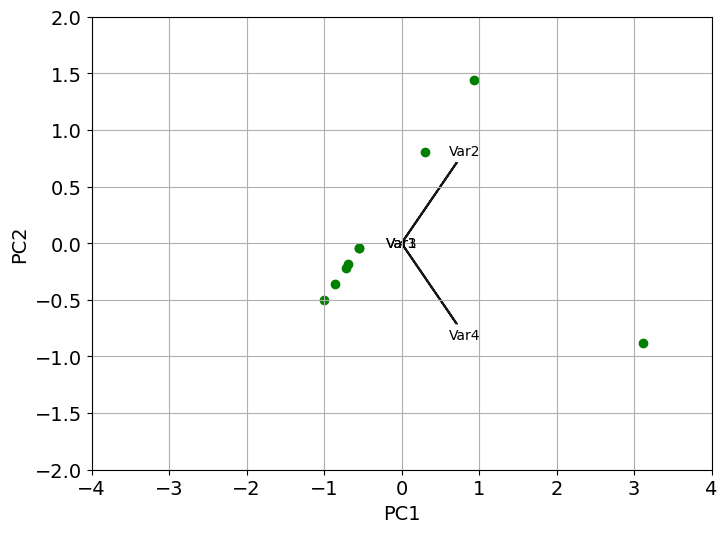

[-------------------------------- [Exercise 5] --------------------------------]


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
0,7,17.0,0,0
1,7,22.0,0,0
2,7,36.0,0,0
3,6,35.0,1,1
4,7,38.0,0,0
5,6,42.0,1,0
6,7,42.0,0,0
7,7,47.0,1,0
8,7,41.0,0,0


Correlations:
Pearson's Correlation


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
Exercise 5,1.000000,-0.169254,-0.755929,-0.661438
Exercise 5 Total Time,-0.169254,1.000000,0.439355,-0.021123
Exercise 5 Times Needed Help,-0.755929,0.439355,1.000000,0.500000
Exercise 5 Number of Errors,-0.661438,-0.021123,0.500000,1.000000


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
Exercise 5,1.000000,0.663324,0.018452,0.052356
Exercise 5 Total Time,0.663324,1.000000,0.236718,0.956985
Exercise 5 Times Needed Help,0.018452,0.236718,1.000000,0.170471
Exercise 5 Number of Errors,0.052356,0.956985,0.170471,1.000000


Spearman's Correlation


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
Exercise 5,1.000000,-0.051972,-0.755929,-0.661438
Exercise 5 Total Time,-0.051972,1.000000,0.412514,-0.275010
Exercise 5 Times Needed Help,-0.755929,0.412514,1.000000,0.500000
Exercise 5 Number of Errors,-0.661438,-0.275010,0.500000,1.000000


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
Exercise 5,1.000000,0.894362,0.018452,0.052356
Exercise 5 Total Time,0.894362,1.000000,0.269865,0.473874
Exercise 5 Times Needed Help,0.018452,0.269865,1.000000,0.170471
Exercise 5 Number of Errors,0.052356,0.473874,0.170471,1.000000


Kendall Correlation


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
Exercise 5,1.000000,-0.045175,-0.755929,-0.661438
Exercise 5 Total Time,-0.045175,1.000000,0.358569,-0.239046
Exercise 5 Times Needed Help,-0.755929,0.358569,1.000000,0.500000
Exercise 5 Number of Errors,-0.661438,-0.239046,0.500000,1.000000


,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
Exercise 5,1.000000,0.883133,0.032509,0.061369
Exercise 5 Total Time,0.883133,1.000000,0.243305,0.436661
Exercise 5 Times Needed Help,0.032509,0.243305,1.000000,0.157299
Exercise 5 Number of Errors,0.061369,0.436661,0.157299,1.000000


---- Question Exercise 5 ----
Population Standard Deviation:
0.415739709641549
Confidence Interval (95%):
(6.438827029800838, 7.116728525754717)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.536, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 5 Total Time ----
Population Standard Deviation:
9.2988782012923
Confidence Interval (95%):
(27.974221252916973, 43.136889858194145)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.869, p=0.121
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 5 Times Needed Help ----
Population Standard Deviation:
0.47140452079103173
Confidence Interval (95%):
(-0.051000689172228386, 0.7176673558388951)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.617, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 5 Number of Errors ----
Population Standard Deviation:
0.3142696805273545
Confidence Interval (95%):
(-0.14511157055926338, 0.3673337927814856)
Normality Tests:
Shapiro-Wilk Test
Statistics=0

,Exercise 5,Exercise 5 Total Time,Exercise 5 Times Needed Help,Exercise 5 Number of Errors
0,0.591078,0.252511,0.585671,0.493817
1,0.171817,0.850584,0.192867,0.458026
2,0.366708,0.410090,0.416833,0.723604
3,0.697589,0.211119,0.667864,0.150848


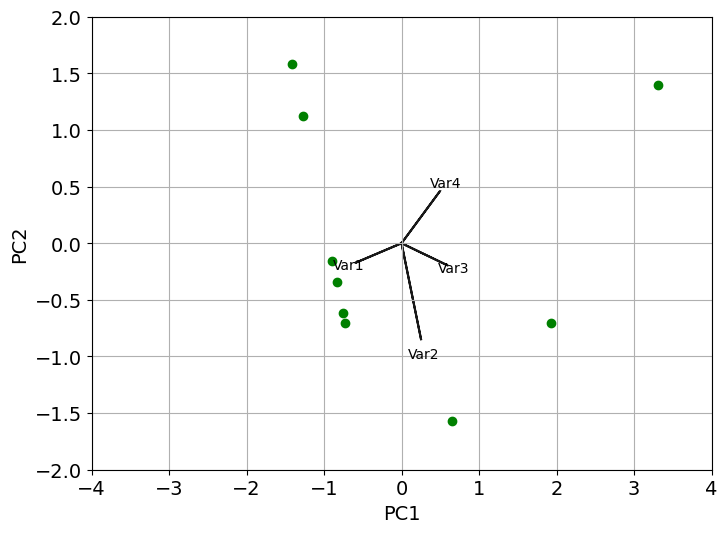

[-------------------------------- [Exercise 6] --------------------------------]


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
0,7,15.0,0,0
1,7,15.0,0,0
2,7,12.0,0,0
3,7,11.0,0,0
4,7,11.0,0,0
5,7,16.0,0,0
6,6,33.0,1,1
7,7,16.0,0,0
8,7,66.0,0,0


Correlations:
Pearson's Correlation


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
Exercise 6,1.000000,-0.237212,-1.000000,-1.000000
Exercise 6 Total Time,-0.237212,1.000000,0.237212,0.237212
Exercise 6 Times Needed Help,-1.000000,0.237212,1.000000,1.000000
Exercise 6 Number of Errors,-1.000000,0.237212,1.000000,1.000000


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
Exercise 6,1.000000,0.538846,0.000000,0.000000
Exercise 6 Total Time,0.538846,1.000000,0.538846,0.538846
Exercise 6 Times Needed Help,0.000000,0.538846,1.000000,0.000000
Exercise 6 Number of Errors,0.000000,0.538846,0.000000,1.000000


Spearman's Correlation


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
Exercise 6,1.000000,-0.416025,-1.000000,-1.000000
Exercise 6 Total Time,-0.416025,1.000000,0.416025,0.416025
Exercise 6 Times Needed Help,-1.000000,0.416025,1.000000,1.000000
Exercise 6 Number of Errors,-1.000000,0.416025,1.000000,1.000000


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
Exercise 6,1.000000,0.265398,0.000000,0.000000
Exercise 6 Total Time,0.265398,1.000000,0.265398,0.265398
Exercise 6 Times Needed Help,0.000000,0.265398,1.000000,0.000000
Exercise 6 Number of Errors,0.000000,0.265398,0.000000,1.000000


Kendall Correlation


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
Exercise 6,1.000000,-0.369274,-1.000000,-1.000000
Exercise 6 Total Time,-0.369274,1.000000,0.369274,0.369274
Exercise 6 Times Needed Help,-1.000000,0.369274,1.000000,1.000000
Exercise 6 Number of Errors,-1.000000,0.369274,1.000000,1.000000


,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
Exercise 6,1.000000,0.239317,0.004678,0.004678
Exercise 6 Total Time,0.239317,1.000000,0.239317,0.239317
Exercise 6 Times Needed Help,0.004678,0.239317,1.000000,0.004678
Exercise 6 Number of Errors,0.004678,0.239317,0.004678,1.000000


---- Question Exercise 6 ----
Population Standard Deviation:
0.3142696805273545
Confidence Interval (95%):
(6.632666207218515, 7.145111570559264)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.390, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 6 Total Time ----
Population Standard Deviation:
16.89181261242657
Confidence Interval (95%):
(7.894846494365099, 35.43848683896824)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.636, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 6 Times Needed Help ----
Population Standard Deviation:
0.31426968052735443
Confidence Interval (95%):
(-0.14511157055926338, 0.3673337927814856)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.390, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 6 Number of Errors ----
Population Standard Deviation:
0.31426968052735443
Confidence Interval (95%):
(-0.14511157055926338, 0.3673337927814856)
Normality Tests:
Shapiro-Wilk Test
Statistics=

,Exercise 6,Exercise 6 Total Time,Exercise 6 Times Needed Help,Exercise 6 Number of Errors
0,0.566417,1.936860e-01,0.566417,0.566417
1,0.111825,9.810636e-01,0.111825,0.111825
2,0.816497,7.036113e-18,0.408248,0.408248
3,0.000000,6.331402e-17,0.707107,0.707107


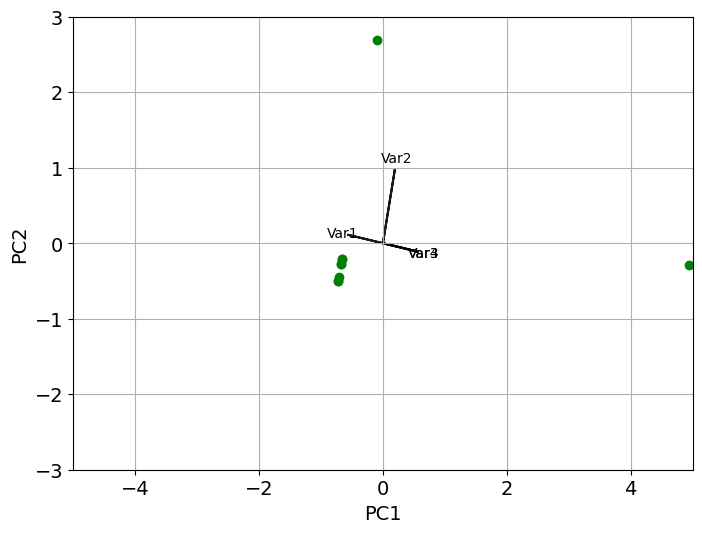

[-------------------------------- [Exercise 7] --------------------------------]


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
0,6,88.0,2,1
1,7,65.0,0,0
2,7,119.0,1,0
3,5,13.0,4,2
4,6,95.0,0,0
5,4,102.0,2,2
6,7,86.0,0,0
7,6,73.0,0,0
8,6,105.0,0,0


Correlations:
Pearson's Correlation


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
Exercise 7,1.000000,0.214339,-0.618718,-0.850420
Exercise 7 Total Time,0.214339,1.000000,-0.557630,-0.442258
Exercise 7 Times Needed Help,-0.618718,-0.557630,1.000000,0.902007
Exercise 7 Number of Errors,-0.850420,-0.442258,0.902007,1.000000


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
Exercise 7,1.000000,0.579724,0.075672,0.003670
Exercise 7 Total Time,0.579724,1.000000,0.118756,0.233272
Exercise 7 Times Needed Help,0.075672,0.118756,1.000000,0.000880
Exercise 7 Number of Errors,0.003670,0.233272,0.000880,1.000000


Spearman's Correlation


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
Exercise 7,1.000000,0.053200,-0.571065,-0.778923
Exercise 7 Total Time,0.053200,1.000000,-0.055048,-0.199205
Exercise 7 Times Needed Help,-0.571065,-0.055048,1.000000,0.904684
Exercise 7 Number of Errors,-0.778923,-0.199205,0.904684,1.000000


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
Exercise 7,1.000000,0.891878,0.108262,0.013372
Exercise 7 Total Time,0.891878,1.000000,0.888140,0.607365
Exercise 7 Times Needed Help,0.108262,0.888140,1.000000,0.000801
Exercise 7 Number of Errors,0.013372,0.607365,0.000801,1.000000


Kendall Correlation


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
Exercise 7,1.000000,0.032075,-0.461880,-0.731564
Exercise 7 Total Time,0.032075,1.000000,-0.033333,-0.149071
Exercise 7 Times Needed Help,-0.461880,-0.033333,1.000000,0.849706
Exercise 7 Number of Errors,-0.731564,-0.149071,0.849706,1.000000


,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
Exercise 7,1.000000,0.910794,0.137084,0.022042
Exercise 7 Total Time,0.910794,1.000000,0.907663,0.613354
Exercise 7 Times Needed Help,0.137084,0.907663,1.000000,0.008092
Exercise 7 Number of Errors,0.022042,0.613354,0.008092,1.000000


---- Question Exercise 7 ----
Population Standard Deviation:
0.9428090415820634
Confidence Interval (95%):
(5.231331954988876, 6.768668045011124)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.853, p=0.081
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 7 Total Time ----
Population Standard Deviation:
29.14120581827749
Confidence Interval (95%):
(59.13019257005175, 106.64758520772602)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.879, p=0.154
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 7 Times Needed Help ----
Population Standard Deviation:
1.3333333333333333
Confidence Interval (95%):
(-0.08706077421754355, 2.0870607742175435)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.763, p=0.008
Sample does not look Gaussian (reject H0)


---- Question Exercise 7 Number of Errors ----
Population Standard Deviation:
0.8314794192830981
Confidence Interval (95%):
(-0.12234594039832314, 1.2334570515094343)
Normality Tests:
Shapiro-Wilk Test
Statistics=0

,Exercise 7,Exercise 7 Total Time,Exercise 7 Times Needed Help,Exercise 7 Number of Errors
0,0.487970,0.358363,0.549643,0.575633
1,0.505920,0.835829,0.100861,0.187782
2,0.606320,0.415747,0.663408,0.139354
3,0.371895,0.010981,0.497603,0.783559


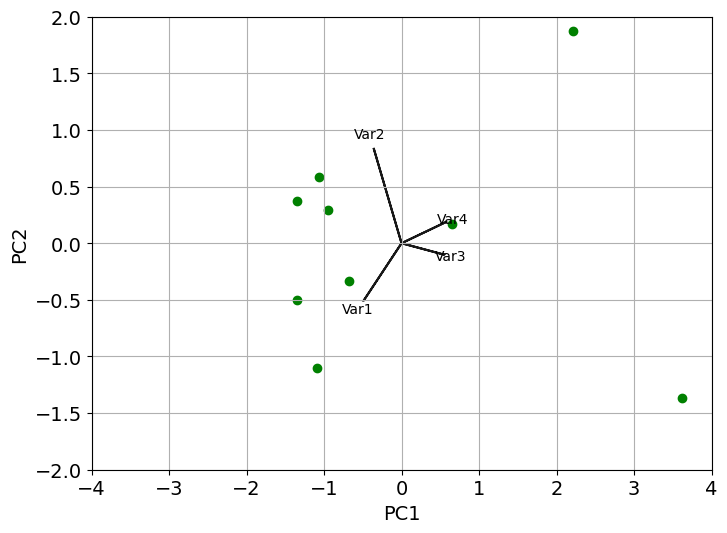

[-------------------------------- [Exercise 8] --------------------------------]


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
0,7,30.0,0,0
1,7,53.0,1,1
2,7,32.0,0,0
3,7,28.0,2,1
4,7,23.0,0,0
5,7,100.0,1,0
6,7,43.0,0,0
7,7,81.0,1,2
8,7,41.0,0,0


Correlations:
Pearson's Correlation


/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
Exercise 8,NaN,NaN,NaN,NaN
Exercise 8 Total Time,NaN,1.000000,0.331849,0.337683
Exercise 8 Times Needed Help,NaN,0.331849,1.000000,0.657895
Exercise 8 Number of Errors,NaN,0.337683,0.657895,1.000000


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
Exercise 8,1.000000,nan,nan,nan
Exercise 8 Total Time,nan,1.000000,0.382970,0.374139
Exercise 8 Times Needed Help,nan,0.382970,1.000000,0.054087
Exercise 8 Number of Errors,nan,0.374139,0.054087,1.000000


Spearman's Correlation


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
Exercise 8,NaN,NaN,NaN,NaN
Exercise 8 Total Time,NaN,1.000000,0.335410,0.249006
Exercise 8 Times Needed Help,NaN,0.335410,1.000000,0.779512
Exercise 8 Number of Errors,NaN,0.249006,0.779512,1.000000


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
Exercise 8,1.000000,nan,nan,nan
Exercise 8 Total Time,nan,1.000000,0.377568,0.518214
Exercise 8 Times Needed Help,nan,0.377568,1.000000,0.013256
Exercise 8 Number of Errors,nan,0.518214,0.013256,1.000000


Kendall Correlation


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
Exercise 8,1.0,NaN,NaN,NaN
Exercise 8 Total Time,NaN,1.000000,0.312772,0.223607
Exercise 8 Times Needed Help,NaN,0.312772,1.000000,0.699379
Exercise 8 Number of Errors,NaN,0.223607,0.699379,1.000000


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
Exercise 8,1.000000,nan,nan,nan
Exercise 8 Total Time,nan,1.000000,0.287726,0.448489
Exercise 8 Times Needed Help,nan,0.287726,1.000000,0.033640
Exercise 8 Number of Errors,nan,0.448489,0.033640,1.000000


---- Question Exercise 8 ----
Population Standard Deviation:
0.0
Confidence Interval (95%):
(nan, nan)
Normality Tests:
Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 8 Total Time ----
Population Standard Deviation:
24.713668932369497
Confidence Interval (95%):
(27.739943826355656, 68.03783395142212)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.844, p=0.064
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 8 Times Needed Help ----
Population Standard Deviation:
0.6849348892187752
Confidence Interval (95%):
(-0.0028688326665212704, 1.1139799437776325)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.763, p=0.008
Sample does not look Gaussian (reject H0)


---- Question Exercise 8 Number of Errors ----
Population Standard Deviation:
0.6849348892187752
Confidence Interval (95%):
(-0.11397994377763243, 1.0028688326665214)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.684, p=0.001
Sample does not look Gauss

/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/pedro/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,Exercise 8,Exercise 8 Total Time,Exercise 8 Times Needed Help,Exercise 8 Number of Errors
0,0.0,0.463359,0.625752,0.627481
1,0.0,0.886130,0.333938,0.321339
2,0.0,0.008461,0.704926,0.709231
3,1.0,0.000000,0.000000,0.000000


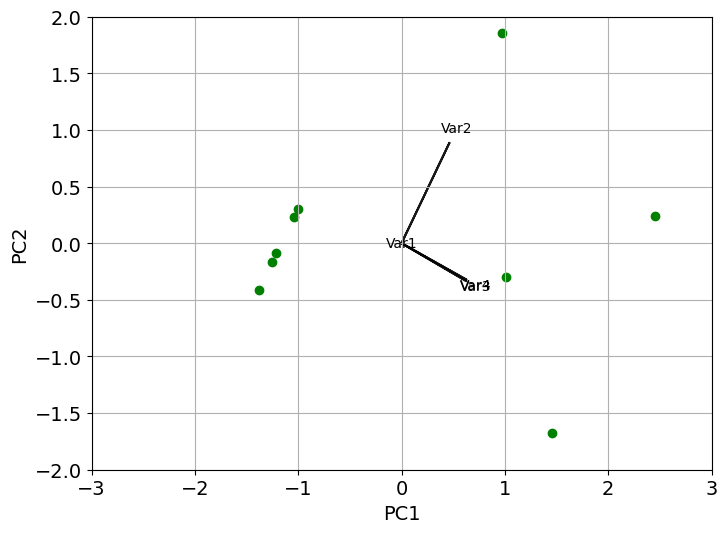

[-------------------------------- [Exercise 9] --------------------------------]


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
0,6,106.0,2,1
1,7,137.0,2,2
2,6,84.0,1,0
3,4,124.0,3,1
4,5,97.0,1,0
5,1,204.0,4,2
6,6,178.0,4,0
7,6,116.0,2,1
8,6,156.0,3,0


Correlations:
Pearson's Correlation


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
Exercise 9,1.000000,-0.520601,-0.488091,-0.382327
Exercise 9 Total Time,-0.520601,1.000000,0.923305,0.354693
Exercise 9 Times Needed Help,-0.488091,0.923305,1.000000,0.250651
Exercise 9 Number of Errors,-0.382327,0.354693,0.250651,1.000000


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
Exercise 9,1.000000,0.150728,0.182524,0.309875
Exercise 9 Total Time,0.150728,1.000000,0.000381,0.348955
Exercise 9 Times Needed Help,0.182524,0.000381,1.000000,0.515361
Exercise 9 Number of Errors,0.309875,0.348955,0.515361,1.000000


Spearman's Correlation


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
Exercise 9,1.000000,-0.146059,-0.301031,-0.068313
Exercise 9 Total Time,-0.146059,1.000000,0.927457,0.347440
Exercise 9 Times Needed Help,-0.301031,0.927457,1.000000,0.243283
Exercise 9 Number of Errors,-0.068313,0.347440,0.243283,1.000000


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
Exercise 9,1.000000,0.707689,0.431188,0.861374
Exercise 9 Total Time,0.707689,1.000000,0.000315,0.359591
Exercise 9 Times Needed Help,0.431188,0.000315,1.000000,0.528186
Exercise 9 Number of Errors,0.861374,0.359591,0.528186,1.000000


Kendall Correlation


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
Exercise 9,1.000000,-0.130744,-0.250640,-0.076923
Exercise 9 Total Time,-0.130744,1.000000,0.852013,0.326860
Exercise 9 Times Needed Help,-0.250640,0.852013,1.000000,0.214834
Exercise 9 Number of Errors,-0.076923,0.326860,0.214834,1.000000


,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
Exercise 9,1.000000,0.644901,0.404166,0.804338
Exercise 9 Total Time,0.644901,1.000000,0.002437,0.259544
Exercise 9 Times Needed Help,0.404166,0.002437,1.000000,0.484631
Exercise 9 Number of Errors,0.804338,0.259544,0.484631,1.000000


---- Question Exercise 9 ----
Population Standard Deviation:
1.6850834320114554
Confidence Interval (95%):
(3.8483811470545763, 6.596063297389868)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.750, p=0.005
Sample does not look Gaussian (reject H0)


---- Question Exercise 9 Total Time ----
Population Standard Deviation:
37.12474799349144
Confidence Interval (95%):
(103.28791258322855, 163.82319852788254)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.955, p=0.740
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 9 Times Needed Help ----
Population Standard Deviation:
1.0657403385139377
Confidence Interval (95%):
(1.5755510563195734, 3.313337832569316)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.899, p=0.248
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 9 Number of Errors ----
Population Standard Deviation:
0.7856742013183862
Confidence Interval (95%):
(0.13722107360184155, 1.418334481953714)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.80

,Exercise 9,Exercise 9 Total Time,Exercise 9 Times Needed Help,Exercise 9 Number of Errors
0,0.468997,0.584546,0.563492,0.347599
1,0.236704,0.289677,0.409726,0.831975
2,0.850867,0.236367,0.201631,0.423675
3,0.006201,0.720086,0.688437,0.086554


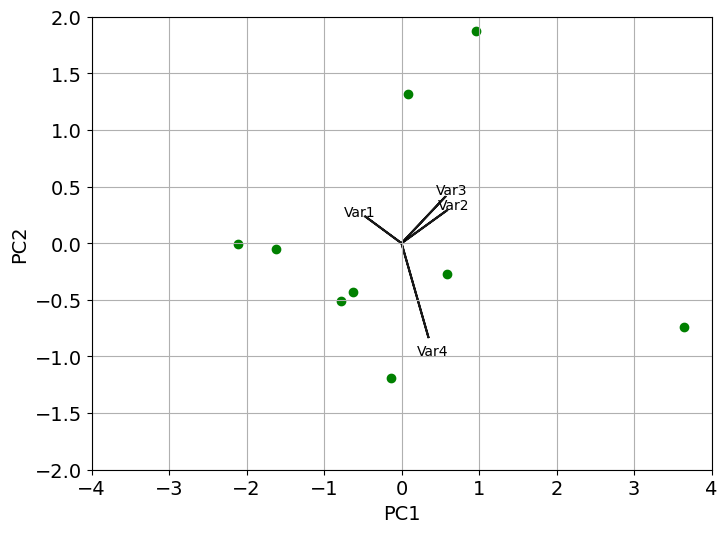

[-------------------------------- [Exercise 10] --------------------------------]


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
0,7,39.0,0,0
1,7,31.0,0,0
2,7,46.0,1,1
3,6,64.0,1,1
4,7,38.0,0,0
5,7,83.0,2,1
6,7,31.0,1,1
7,7,58.0,0,0
8,7,78.0,1,1


Correlations:
Pearson's Correlation


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
Exercise 10,1.000000,-0.228600,-0.176777,-0.316228
Exercise 10 Total Time,-0.228600,1.000000,0.655559,0.506028
Exercise 10 Times Needed Help,-0.176777,0.655559,1.000000,0.894427
Exercise 10 Number of Errors,-0.316228,0.506028,0.894427,1.000000


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
Exercise 10,1.000000,0.554106,0.649120,0.407084
Exercise 10 Total Time,0.554106,1.000000,0.055247,0.164548
Exercise 10 Times Needed Help,0.649120,0.055247,1.000000,0.001134
Exercise 10 Number of Errors,0.407084,0.164548,0.001134,1.000000


Spearman's Correlation


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
Exercise 10,1.000000,-0.275010,-0.225000,-0.316228
Exercise 10 Total Time,-0.275010,1.000000,0.586687,0.478311
Exercise 10 Times Needed Help,-0.225000,0.586687,1.000000,0.948683
Exercise 10 Number of Errors,-0.316228,0.478311,0.948683,1.000000


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
Exercise 10,1.000000,0.473874,0.560533,0.407084
Exercise 10 Total Time,0.473874,1.000000,0.096788,0.192772
Exercise 10 Times Needed Help,0.560533,0.096788,1.000000,0.000096
Exercise 10 Number of Errors,0.407084,0.192772,0.000096,1.000000


Kendall Correlation


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
Exercise 10,1.000000,-0.239046,-0.216506,-0.316228
Exercise 10 Total Time,-0.239046,1.000000,0.517549,0.415761
Exercise 10 Times Needed Help,-0.216506,0.517549,1.000000,0.912871
Exercise 10 Number of Errors,-0.316228,0.415761,0.912871,1.000000


,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
Exercise 10,1.000000,0.436661,0.524518,0.371093
Exercise 10 Total Time,0.436661,1.000000,0.081209,0.176098
Exercise 10 Times Needed Help,0.524518,0.081209,1.000000,0.007290
Exercise 10 Number of Errors,0.371093,0.176098,0.007290,1.000000


---- Question Exercise 10 ----
Population Standard Deviation:
0.3142696805273545
Confidence Interval (95%):
(6.632666207218515, 7.145111570559264)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.390, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 10 Total Time ----
Population Standard Deviation:
18.55921454276674
Confidence Interval (95%):
(36.868754402702876, 67.13124559729712)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.900, p=0.250
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 10 Times Needed Help ----
Population Standard Deviation:
0.6666666666666666
Confidence Interval (95%):
(0.12313627955789486, 1.2101970537754383)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.805, p=0.024
Sample does not look Gaussian (reject H0)


---- Question Exercise 10 Number of Errors ----
Population Standard Deviation:
0.4969039949999533
Confidence Interval (95%):
(0.1504319244182259, 0.9606791866928852)
Normality Tests:
Shapiro-Wilk Test
Statistics=

,Exercise 10,Exercise 10 Total Time,Exercise 10 Times Needed Help,Exercise 10 Number of Errors
0,0.267127,0.494756,0.592372,0.577023
1,0.955125,0.122582,0.260505,0.069627
2,0.012359,0.836871,0.213837,0.503753
3,0.127386,0.199592,0.731783,0.639085


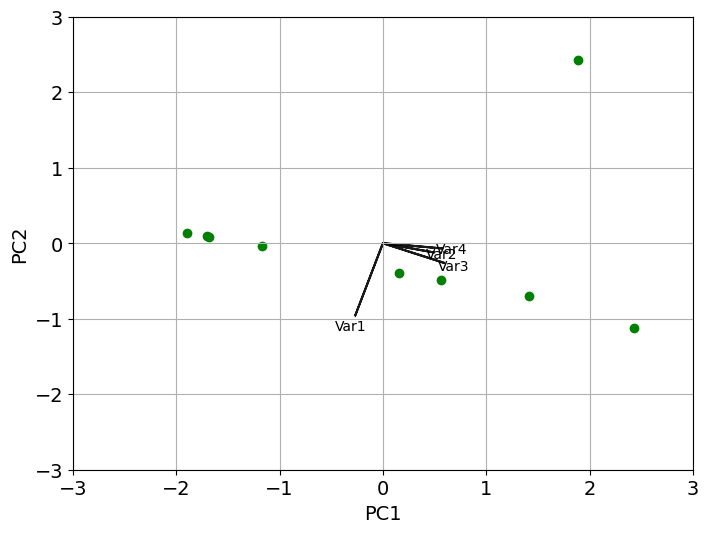

[-------------------------------- [Exercise 11] --------------------------------]


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
0,7,11.0,0,0
1,7,20.0,0,0
2,7,30.0,1,1
3,7,25.0,0,0
4,7,24.0,0,0
5,6,32.0,1,1
6,7,25.0,0,0
7,7,32.0,1,0
8,7,34.0,0,0


Correlations:
Pearson's Correlation


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
Exercise 11,1.000000,-0.316699,-0.500000,-0.661438
Exercise 11 Total Time,-0.316699,1.000000,0.564300,0.400454
Exercise 11 Times Needed Help,-0.500000,0.564300,1.000000,0.755929
Exercise 11 Number of Errors,-0.661438,0.400454,0.755929,1.000000


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
Exercise 11,1.000000,0.406346,0.170471,0.052356
Exercise 11 Total Time,0.406346,1.000000,0.113473,0.285507
Exercise 11 Times Needed Help,0.170471,0.113473,1.000000,0.018452
Exercise 11 Number of Errors,0.052356,0.285507,0.018452,1.000000


Spearman's Correlation


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
Exercise 11,1.000000,-0.345215,-0.500000,-0.661438
Exercise 11 Total Time,-0.345215,1.000000,0.552345,0.365342
Exercise 11 Times Needed Help,-0.500000,0.552345,1.000000,0.755929
Exercise 11 Number of Errors,-0.661438,0.365342,0.755929,1.000000


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
Exercise 11,1.000000,0.362884,0.170471,0.052356
Exercise 11 Total Time,0.362884,1.000000,0.123045,0.333624
Exercise 11 Times Needed Help,0.170471,0.123045,1.000000,0.018452
Exercise 11 Number of Errors,0.052356,0.333624,0.018452,1.000000


Kendall Correlation


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
Exercise 11,1.000000,-0.303170,-0.500000,-0.661438
Exercise 11 Total Time,-0.303170,1.000000,0.485071,0.320844
Exercise 11 Times Needed Help,-0.500000,0.485071,1.000000,0.755929
Exercise 11 Number of Errors,-0.661438,0.320844,0.755929,1.000000


,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
Exercise 11,1.000000,0.328858,0.157299,0.061369
Exercise 11 Total Time,0.328858,1.000000,0.118225,0.301444
Exercise 11 Times Needed Help,0.157299,0.118225,1.000000,0.032509
Exercise 11 Number of Errors,0.061369,0.301444,0.032509,1.000000


---- Question Exercise 11 ----
Population Standard Deviation:
0.3142696805273545
Confidence Interval (95%):
(6.632666207218515, 7.145111570559264)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.390, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 11 Total Time ----
Population Standard Deviation:
6.822258414670556
Confidence Interval (95%):
(20.326731753265946, 31.451046024511832)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.907, p=0.295
Sample looks Gaussian (fail to reject H0)


---- Question Exercise 11 Times Needed Help ----
Population Standard Deviation:
0.47140452079103173
Confidence Interval (95%):
(-0.051000689172228386, 0.7176673558388951)
Normality Tests:
Shapiro-Wilk Test
Statistics=0.617, p=0.000
Sample does not look Gaussian (reject H0)


---- Question Exercise 11 Number of Errors ----
Population Standard Deviation:
0.41573970964154905
Confidence Interval (95%):
(-0.1167285257547171, 0.5611729701991615)
Normality Tests:
Shapiro-Wilk Test
Stati

,Exercise 11,Exercise 11 Total Time,Exercise 11 Times Needed Help,Exercise 11 Number of Errors
0,0.473513,0.417686,0.546642,0.550006
1,0.534111,0.783763,0.146534,0.281015
2,0.649331,0.417655,0.532495,0.346962
3,0.262449,0.191883,0.629412,0.705792


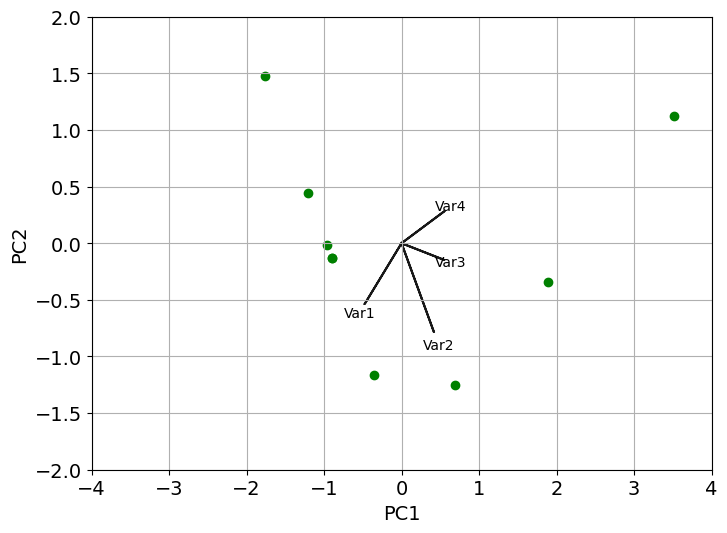

In [61]:
for i in range(1,12):
    print('[-------------------------------- [Exercise '+str(i)+'] --------------------------------]')
    data_exercise = data_exercises_seq.filter(regex='Exercise ('+str(i)+'$|'+str(i)+' [A-z]+)').drop(columns='Exercise '+str(i)+' Time First Needed Help')
    display(data_exercise)
    
    print('Correlations:')
    calculate_correlation(data_exercise)
    
    for column in data_exercise:
        print('---- Question', column,'----')
        print('Population Standard Deviation:')
        print(data_exercise[column].std(ddof=0))
        print('Confidence Interval (95%):')
        print(confidence_interval_t(data_exercise[column]))
        print('Normality Tests:')
        normality_tests(data_exercise[column])
        print('\n')
    
    data_exercise_scaled = StandardScaler().fit_transform(data_exercise)
    pca = PCA()
    principalComponents = pca.fit_transform(data_exercise_scaled)
    principalDf = pd.DataFrame(data=principalComponents[:,0:2], columns=['principal component 1', 'principal component 2'])
    print('Explained Variance Ratio:',pca.explained_variance_ratio_)
    print('Components:')
    display(pd.DataFrame(abs(pca.components_), columns=data_exercise.columns))
    
    biplot(principalComponents[:,0:2], np.transpose(pca.components_[0:2, :]), None)
    plt.show()

## General Analysis

In [62]:
data_full = data['Full'].drop(columns=[
    'Participant',
    'Timestamp',
    'Gender',
    'Education',
    'Education Area',
    'Devices Owned',
    'Experience with Programming Languages',
    'Additional Feedback',
    'Contact'
]).dropna(axis='columns')

data_full['Number of Devices Owned'] = num_devices_owned
data_full['Number of Programming Languages'] = num_programming_languages

data_full = data_full[[
    'Age',
    'Number of Devices Owned',
    'Usage of Multiple Devices',
    'Years of Programming Experience',
    'Programming Experience (Self Assessment)',
    'JavaScript Experience (Self Assessment)',
    'Number of Programming Languages',
    'DS1',
    'DS2',
    'DS3',
    'DS4',
    'DS5',
    'DS6',
    'DS7',
    'DS8', 
    'ULI1', 
    'ULI2', 
    'SDS1', 
    'SDS2',
    'SDS3',
    'SDS4',
    'SDS5',
    'SDS6',
    'NPS'
]]

data_full

,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,...,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
0,52,3,7,30,6,6,9,7,7,7,...,7,7,7,7,5,7,7,7,7,9
1,23,2,5,5,6,6,7,7,6,6,...,5,4,6,5,6,6,7,7,7,8
2,24,6,6,6,4,4,4,5,7,6,...,7,6,6,7,2,6,3,6,2,9
3,22,3,3,5,6,5,5,7,6,6,...,7,7,7,7,6,7,6,7,7,9
4,22,3,6,7,5,5,9,6,6,6,...,6,7,6,7,6,7,6,6,6,8
5,24,5,5,5,4,4,4,7,6,6,...,6,6,7,7,7,7,7,7,5,7
6,35,7,7,20,7,7,6,7,6,7,...,7,6,7,7,7,7,7,7,7,10
7,25,5,5,6,5,5,6,7,7,7,...,6,6,7,7,6,6,6,6,6,10
8,29,5,7,4,3,3,6,7,6,6,...,7,7,5,7,5,6,5,5,5,10
9,25,4,6,6,5,5,7,6,7,6,...,6,7,6,7,4,7,4,6,6,9


### General Correlation

In [63]:
calculate_correlation(data_full);

Pearson's Correlation


,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,...,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
Age,1.000000,-0.007656,0.415113,0.944603,0.351712,0.408330,0.256588,0.380090,-0.044721,0.318839,...,0.176520,0.068414,0.185032,0.224952,-0.054462,0.129157,0.221817,0.265382,0.317213,0.243651
Number of Devices Owned,-0.007656,1.000000,0.333565,-0.043402,0.010855,0.121426,-0.015943,0.005971,0.388824,0.403727,...,0.331460,0.332020,0.361434,0.498656,0.294777,0.300922,0.066081,0.152693,-0.065184,0.418476
Usage of Multiple Devices,0.415113,0.333565,1.000000,0.398922,0.245044,0.205547,0.462585,0.045868,0.025099,-0.083819,...,0.160946,0.088271,0.015708,-0.083692,-0.047002,-0.187933,0.048344,0.283799,0.206010,0.189814
Years of Programming Experience,0.944603,-0.043402,0.398922,1.000000,0.548232,0.500245,0.281101,0.315114,-0.135465,0.234891,...,0.120274,-0.073294,0.134098,0.120274,-0.086376,0.060747,0.178570,0.222799,0.319841,0.114075
Programming Experience (Self Assessment),0.351712,0.010855,0.245044,0.548232,1.000000,0.754820,0.512719,0.238212,-0.064409,0.026887,...,-0.090863,-0.383151,0.042829,-0.247807,0.099329,0.027558,0.175140,0.129772,0.422190,-0.210156
JavaScript Experience (Self Assessment),0.408330,0.121426,0.205547,0.500245,0.754820,1.000000,0.617103,0.389872,0.348753,0.300763,...,-0.278681,-0.264977,0.405048,0.048167,0.325066,0.238176,0.503042,0.404986,0.518370,0.091624
Number of Programming Languages,0.256588,-0.015943,0.462585,0.281101,0.512719,0.617103,1.000000,0.257015,0.264882,0.110571,...,0.013588,-0.144689,0.018650,-0.050956,0.186739,0.005667,0.278354,0.200731,0.359331,-0.096928
DS1,0.380090,0.005971,0.045868,0.315114,0.238212,0.389872,0.257015,1.000000,0.289349,0.576810,...,-0.021205,-0.126814,0.216657,0.180240,0.443948,0.159174,0.566684,0.442523,0.513626,0.151259
DS2,-0.044721,0.388824,0.025099,-0.135465,-0.064409,0.348753,0.264882,0.289349,1.000000,0.623173,...,0.060917,0.142172,0.408752,0.304587,0.340103,0.254043,0.457450,0.285684,0.189521,0.231755
DS3,0.318839,0.403727,-0.083819,0.234891,0.026887,0.300763,0.110571,0.576810,0.623173,1.000000,...,0.268823,0.258586,0.474213,0.544911,0.493000,0.515085,0.529543,0.378208,0.329368,0.445708


,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
Age,1.000000,0.975183,0.077170,0.000000,0.139767,0.082631,0.288965,0.108446,0.855748,0.183361,0.085575,0.174703,0.190676,0.130686,0.469738,0.780790,0.448231,0.354488,0.824749,0.598209,0.361411,0.272170,0.185731,0.314799
Number of Devices Owned,0.975183,1.000000,0.162829,0.859961,0.964822,0.620465,0.948349,0.980645,0.099914,0.086494,0.896743,0.400337,0.377729,0.985082,0.165663,0.164905,0.128400,0.029765,0.220529,0.210605,0.788100,0.532585,0.790916,0.074564
Usage of Multiple Devices,0.077170,0.162829,1.000000,0.090667,0.311953,0.398558,0.046123,0.852085,0.918762,0.732987,0.147795,0.538534,0.971736,0.400934,0.510390,0.719336,0.949109,0.733378,0.848469,0.441020,0.844192,0.239006,0.397471,0.436377
Years of Programming Experience,0.000000,0.859961,0.090667,1.000000,0.015087,0.029166,0.243695,0.188819,0.580298,0.333048,0.085876,0.378046,0.305964,0.142939,0.623809,0.765555,0.584159,0.623809,0.725137,0.804877,0.464512,0.359233,0.181912,0.641925
Programming Experience (Self Assessment),0.139767,0.964822,0.311953,0.015087,1.000000,0.000188,0.024786,0.326058,0.793350,0.912998,0.581923,0.566988,0.688396,0.401921,0.711428,0.105398,0.861793,0.306354,0.685791,0.910833,0.473273,0.596453,0.071763,0.387827
JavaScript Experience (Self Assessment),0.082631,0.620465,0.398558,0.029166,0.000188,1.000000,0.004882,0.098924,0.143362,0.210857,0.124187,0.245855,0.037951,0.061212,0.247949,0.272930,0.085372,0.844755,0.174477,0.326134,0.028135,0.085424,0.022980,0.709110
Number of Programming Languages,0.288965,0.948349,0.046123,0.243695,0.024786,0.004882,1.000000,0.288136,0.273108,0.652252,0.363296,0.606685,0.423454,0.339541,0.955971,0.554527,0.939595,0.835881,0.443980,0.981632,0.248528,0.409938,0.130802,0.693029
DS1,0.108446,0.980645,0.852085,0.188819,0.326058,0.098924,0.288136,1.000000,0.229544,0.009725,0.341676,0.104869,0.004356,0.067301,0.931336,0.604919,0.372971,0.460276,0.056896,0.515118,0.011412,0.057792,0.024489,0.536487
DS2,0.855748,0.099914,0.918762,0.580298,0.793350,0.143362,0.273108,0.229544,1.000000,0.004366,0.685342,0.015530,0.001000,0.038512,0.804339,0.561509,0.082282,0.204827,0.154239,0.293941,0.048921,0.235766,0.437098,0.339730
DS3,0.183361,0.086494,0.732987,0.333048,0.912998,0.210857,0.652252,0.009725,0.004366,1.000000,0.204929,0.001237,0.005931,0.014088,0.265767,0.285095,0.040240,0.015839,0.031975,0.024017,0.019716,0.110351,0.168512,0.055805


Spearman's Correlation


,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,...,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
Age,1.000000,0.267001,0.568491,0.573991,0.259888,0.191245,0.167563,0.547701,0.110671,0.451217,...,0.178297,0.033383,0.033846,0.343349,-0.056226,0.130426,0.009969,0.082863,0.108288,0.265934
Number of Devices Owned,0.267001,1.000000,0.277469,0.038470,-0.070093,0.001405,-0.050332,-0.060044,0.401097,0.335144,...,0.267416,0.270854,0.345197,0.492170,0.284781,0.226592,0.039336,0.086978,-0.088194,0.386269
Usage of Multiple Devices,0.568491,0.277469,1.000000,0.501501,0.366448,0.192693,0.497333,0.186725,0.152915,0.042555,...,0.351971,0.071188,-0.102454,-0.066589,-0.020866,-0.139801,0.037137,0.110799,0.166852,0.116014
Years of Programming Experience,0.573991,0.038470,0.501501,1.000000,0.641484,0.432938,0.379928,0.219699,0.193920,0.287138,...,0.076413,-0.219770,-0.087630,0.003057,-0.110624,0.013476,0.003172,-0.064910,0.120624,-0.153651
Programming Experience (Self Assessment),0.259888,-0.070093,0.366448,0.641484,1.000000,0.792234,0.586967,0.254161,-0.067453,0.043895,...,-0.038464,-0.348659,0.044469,-0.244296,0.154384,0.040267,0.193722,0.187885,0.443357,-0.173937
JavaScript Experience (Self Assessment),0.191245,0.001405,0.192693,0.432938,0.792234,1.000000,0.701978,0.173002,0.094155,0.180086,...,-0.274044,-0.223816,0.402584,-0.002084,0.351101,0.213621,0.469450,0.434561,0.607014,0.082291
Number of Programming Languages,0.167563,-0.050332,0.497333,0.379928,0.586967,0.701978,1.000000,0.103053,0.239736,0.037984,...,-0.129277,-0.139897,0.012044,-0.092631,0.177661,0.009136,0.248545,0.129703,0.413589,-0.084478
DS1,0.547701,-0.060044,0.186725,0.219699,0.254161,0.173002,0.103053,1.000000,-0.065893,0.531587,...,0.114830,-0.076785,0.221823,0.209741,0.477882,0.182102,0.489861,0.406077,0.419856,0.150046
DS2,0.110671,0.401097,0.152915,0.193920,-0.067453,0.094155,0.239736,-0.065893,1.000000,0.489461,...,0.106809,0.079492,0.276955,0.216956,0.040933,-0.003679,0.148943,0.141765,0.192098,0.287924
DS3,0.451217,0.335144,0.042555,0.287138,0.043895,0.180086,0.037984,0.531587,0.489461,1.000000,...,0.295503,0.224473,0.478944,0.602372,0.486479,0.530439,0.499415,0.396452,0.433244,0.450313


,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
Age,1.000000,0.269146,0.011095,0.010173,0.282590,0.432861,0.492917,0.015205,0.651957,0.052490,0.417518,0.237907,0.182954,0.308497,0.465207,0.892082,0.890591,0.150093,0.819160,0.594587,0.967691,0.735927,0.659016,0.271137
Number of Devices Owned,0.269146,1.000000,0.250098,0.875749,0.775538,0.995445,0.837863,0.807092,0.088760,0.160725,0.924155,0.385366,0.479034,0.799380,0.268373,0.262032,0.147767,0.032309,0.237314,0.350897,0.872974,0.723292,0.719571,0.102358
Usage of Multiple Devices,0.011095,0.250098,1.000000,0.028700,0.122800,0.429319,0.030271,0.444017,0.531981,0.862669,0.426653,0.901755,0.949644,0.524017,0.139455,0.772119,0.676409,0.786506,0.932430,0.568119,0.880025,0.651580,0.494781,0.636238
Years of Programming Experience,0.010173,0.875749,0.028700,1.000000,0.003073,0.064096,0.108608,0.366130,0.426331,0.233285,0.619609,0.488706,0.305554,0.089312,0.755862,0.365972,0.721297,0.990092,0.652098,0.956335,0.989718,0.791777,0.622793,0.529987
Programming Experience (Self Assessment),0.282590,0.775538,0.122800,0.003073,1.000000,0.000053,0.008241,0.293710,0.783798,0.858384,0.257699,0.609580,0.771651,0.509146,0.875770,0.143478,0.856551,0.313479,0.528000,0.869991,0.426813,0.441139,0.057267,0.476366
JavaScript Experience (Self Assessment),0.432861,0.995445,0.429319,0.064096,0.000053,1.000000,0.000807,0.478776,0.701421,0.460666,0.011804,0.541966,0.777510,0.276587,0.256233,0.356987,0.087474,0.993244,0.140505,0.379870,0.042575,0.062994,0.005851,0.737691
Number of Programming Languages,0.492917,0.837863,0.030271,0.108608,0.008241,0.000807,1.000000,0.674616,0.322879,0.877307,0.163543,0.857689,0.760735,0.482728,0.597867,0.567851,0.960970,0.706046,0.466825,0.970389,0.304870,0.596650,0.078373,0.730962
DS1,0.015205,0.807092,0.444017,0.366130,0.293710,0.478776,0.674616,1.000000,0.788691,0.019161,0.534922,0.190832,0.135908,0.305356,0.639709,0.754708,0.361396,0.388789,0.038509,0.455577,0.033255,0.084505,0.073513,0.539798
DS2,0.651957,0.088760,0.531981,0.426331,0.783798,0.701421,0.322879,0.788691,1.000000,0.033420,0.328145,0.237407,0.352673,0.095224,0.663409,0.746328,0.251013,0.372295,0.867857,0.988074,0.542815,0.562639,0.430773,0.231951
DS3,0.052490,0.160725,0.862669,0.233285,0.858384,0.460666,0.877307,0.019161,0.033420,1.000000,0.166142,0.002422,0.005383,0.017150,0.219340,0.355541,0.038019,0.006346,0.034678,0.019472,0.029478,0.092869,0.063887,0.053023


Kendall Correlation


,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,...,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
Age,1.000000,0.237595,0.463172,0.490323,0.212733,0.129912,0.160773,0.454369,0.093619,0.395718,...,0.156576,0.070720,0.021216,0.296671,-0.041025,0.113846,0.006717,0.055304,0.088567,0.169108
Number of Devices Owned,0.237595,1.000000,0.228909,0.033942,-0.072206,0.000000,-0.033833,-0.059761,0.344772,0.291464,...,0.234120,0.238117,0.290206,0.442226,0.237416,0.199649,0.028270,0.072739,-0.086022,0.284699
Usage of Multiple Devices,0.463172,0.228909,1.000000,0.414048,0.298582,0.156187,0.391733,0.176515,0.135779,0.034435,...,0.322705,0.061540,-0.107695,-0.062748,-0.014875,-0.115580,0.043838,0.075196,0.133392,0.095653
Years of Programming Experience,0.490323,0.033942,0.414048,1.000000,0.521540,0.341873,0.282960,0.178502,0.171634,0.253259,...,0.074168,-0.198015,-0.077791,0.000000,-0.068375,0.007590,-0.013434,-0.076043,0.095379,-0.128522
Programming Experience (Self Assessment),0.212733,-0.072206,0.298582,0.521540,1.000000,0.698186,0.451462,0.233019,-0.058088,0.050509,...,-0.035062,-0.285844,0.045133,-0.210373,0.138183,0.040365,0.178612,0.161769,0.384068,-0.143900
JavaScript Experience (Self Assessment),0.129912,0.000000,0.156187,0.341873,0.698186,1.000000,0.558872,0.146183,0.082681,0.159366,...,-0.253278,-0.187372,0.337270,0.000000,0.275362,0.185003,0.398640,0.373649,0.527079,0.064520
Number of Programming Languages,0.160773,-0.033833,0.391733,0.282960,0.451462,0.558872,1.000000,0.072789,0.209966,0.047334,...,-0.106787,-0.091640,0.000000,-0.065715,0.102233,0.015131,0.174078,0.089581,0.292011,-0.074169
DS1,0.454369,-0.059761,0.176515,0.178502,0.233019,0.146183,0.072789,1.000000,-0.068680,0.507620,...,0.103639,-0.071151,0.204560,0.196915,0.421350,0.162266,0.439261,0.356454,0.359856,0.127605
DS2,0.093619,0.344772,0.135779,0.171634,-0.058088,0.082681,0.209966,-0.068680,1.000000,0.459377,...,0.099652,0.068414,0.239447,0.199304,0.024804,0.000000,0.121835,0.100314,0.156528,0.237211
DS3,0.395718,0.291464,0.034435,0.253259,0.050509,0.159366,0.047334,0.507620,0.459377,1.000000,...,0.272950,0.199533,0.451118,0.556010,0.427772,0.484145,0.436706,0.364656,0.401158,0.406601


,Age,Number of Devices Owned,Usage of Multiple Devices,Years of Programming Experience,Programming Experience (Self Assessment),JavaScript Experience (Self Assessment),Number of Programming Languages,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8,ULI1,ULI2,SDS1,SDS2,SDS3,SDS4,SDS5,SDS6,NPS
Age,1.000000,0.198371,0.013674,0.006318,0.254802,0.484305,0.369517,0.020152,0.636208,0.044143,0.451756,0.246998,0.171963,0.298227,0.435645,0.709504,0.911016,0.139655,0.825736,0.561340,0.970995,0.767466,0.633539,0.361725
Number of Devices Owned,0.198371,1.000000,0.236468,0.854214,0.707271,1.000000,0.854356,0.766650,0.090769,0.150009,0.908160,0.380011,0.459972,0.838027,0.257795,0.223072,0.137563,0.032557,0.215732,0.322597,0.881793,0.705549,0.652777,0.135709
Usage of Multiple Devices,0.013674,0.236468,1.000000,0.027510,0.126846,0.421839,0.036608,0.388957,0.512703,0.867250,0.411869,0.846221,0.933518,0.589163,0.125315,0.756904,0.588017,0.765663,0.939216,0.573565,0.820650,0.700967,0.492764,0.622126
Years of Programming Experience,0.006318,0.854214,0.027510,1.000000,0.005241,0.065693,0.114248,0.361345,0.385843,0.197695,0.598371,0.455133,0.296241,0.085359,0.711927,0.296920,0.681972,1.000000,0.713652,0.969111,0.942029,0.684320,0.607655,0.488194
Programming Experience (Self Assessment),0.254802,0.707271,0.126846,0.005241,1.000000,0.000305,0.015431,0.252716,0.778200,0.805234,0.233551,0.567214,0.774011,0.513331,0.866974,0.148197,0.819410,0.314887,0.476239,0.843299,0.352955,0.406103,0.047033,0.455921
JavaScript Experience (Self Assessment),0.484305,1.000000,0.421839,0.065693,0.000305,1.000000,0.002566,0.470430,0.686731,0.433861,0.011028,0.540774,0.805166,0.251603,0.223529,0.340411,0.086155,1.000000,0.153350,0.362106,0.037059,0.053602,0.006119,0.736698
Number of Programming Languages,0.369517,0.854356,0.036608,0.114248,0.015431,0.002566,1.000000,0.709095,0.287653,0.809320,0.188307,0.793970,0.778744,0.424038,0.594101,0.628518,1.000000,0.742957,0.582390,0.938325,0.344952,0.631205,0.115163,0.688476
DS1,0.020152,0.766650,0.388957,0.361345,0.252716,0.470430,0.709095,1.000000,0.750759,0.018087,0.515443,0.168408,0.126805,0.289168,0.636827,0.731222,0.323366,0.369684,0.038105,0.448426,0.029171,0.080547,0.075639,0.527880
DS2,0.636208,0.090769,0.512703,0.385843,0.778200,0.686731,0.287653,0.750759,1.000000,0.034617,0.322981,0.235804,0.356144,0.087836,0.653906,0.744231,0.253498,0.369887,0.904010,1.000000,0.550067,0.627095,0.445222,0.246355
DS3,0.044143,0.150009,0.867250,0.197695,0.805234,0.433861,0.809320,0.018087,0.034617,1.000000,0.140975,0.003469,0.007083,0.020090,0.216258,0.338046,0.030312,0.011773,0.036269,0.024496,0.031026,0.075403,0.048870,0.045448
